In [1]:
from scipy.odr import *
import sys
sys.path.insert(0, '/home/noah/Desktop/large_analysis/ca_analysis')
import numpy as np
import matplotlib.pyplot as plt
import fileread as fr
import predefined as pd
import wave_ops as wo
from scipy.optimize import curve_fit


def gauss(x,*pars):
    a,mu,sigma=pars
    return a*np.exp(-1.*(x-mu)**2./(2.*sigma**2.))

def lingauss(x,*pars):
    a,mu,sigma,m,b=pars
    return a*np.exp(-1.*(x-mu)**2./(2.*sigma**2.))+m*x+b
dataloc='/home/noah/Desktop/large_analysis/ca_analysis/cur_data/'
simloc= '/home/noah/Desktop/large_analysis/zeck_simulation/'

sndata=np.concatenate((pd.precuts(fr.gen_output(dataloc+'Run_131-all.dat')[0]),pd.precuts(fr.gen_output(dataloc+'Run_132-all.dat')[0])))
bidata=np.concatenate((pd.precuts(fr.gen_output(dataloc+'Run_136-all.dat')[0]),pd.precuts(fr.gen_output(dataloc+'Run_137-all.dat')[0])))
cedata=np.concatenate((pd.precuts(fr.gen_output(dataloc+'Run_133-all.dat')[0]),pd.precuts(fr.gen_output(dataloc+'/Run_134-all.dat')[0])))
cedata=np.concatenate((cedata,pd.precuts(fr.gen_output(dataloc+'Run_135-all.dat')[0])))
#bidata=pd.precuts(fr.gen_output('../pileup/Run_138-all.dat')[0])
#data=np.concatenate((sndata,bidata))


snsim=fr.simulation(simloc+'113Snaf.txt')
bisim=fr.simulation(simloc+'207Biaf.txt')
cesim=fr.simulation(simloc+'139Ceaf.txt')
snsim=pd.sim_spixel_cut(snsim)
snsim=pd.sim_comb_single_pixel(snsim)
snsim=snsim[np.logical_not(np.isnan(snsim['energy']))]
bisim=pd.sim_spixel_cut(bisim)
bisim=pd.sim_comb_single_pixel(bisim)
bisim=bisim[np.logical_not(np.isnan(bisim['energy']))]
cesim=pd.sim_spixel_cut(cesim)
cesim=pd.sim_comb_single_pixel(cesim)
cesim=cesim[np.logical_not(np.isnan(cesim['energy']))]

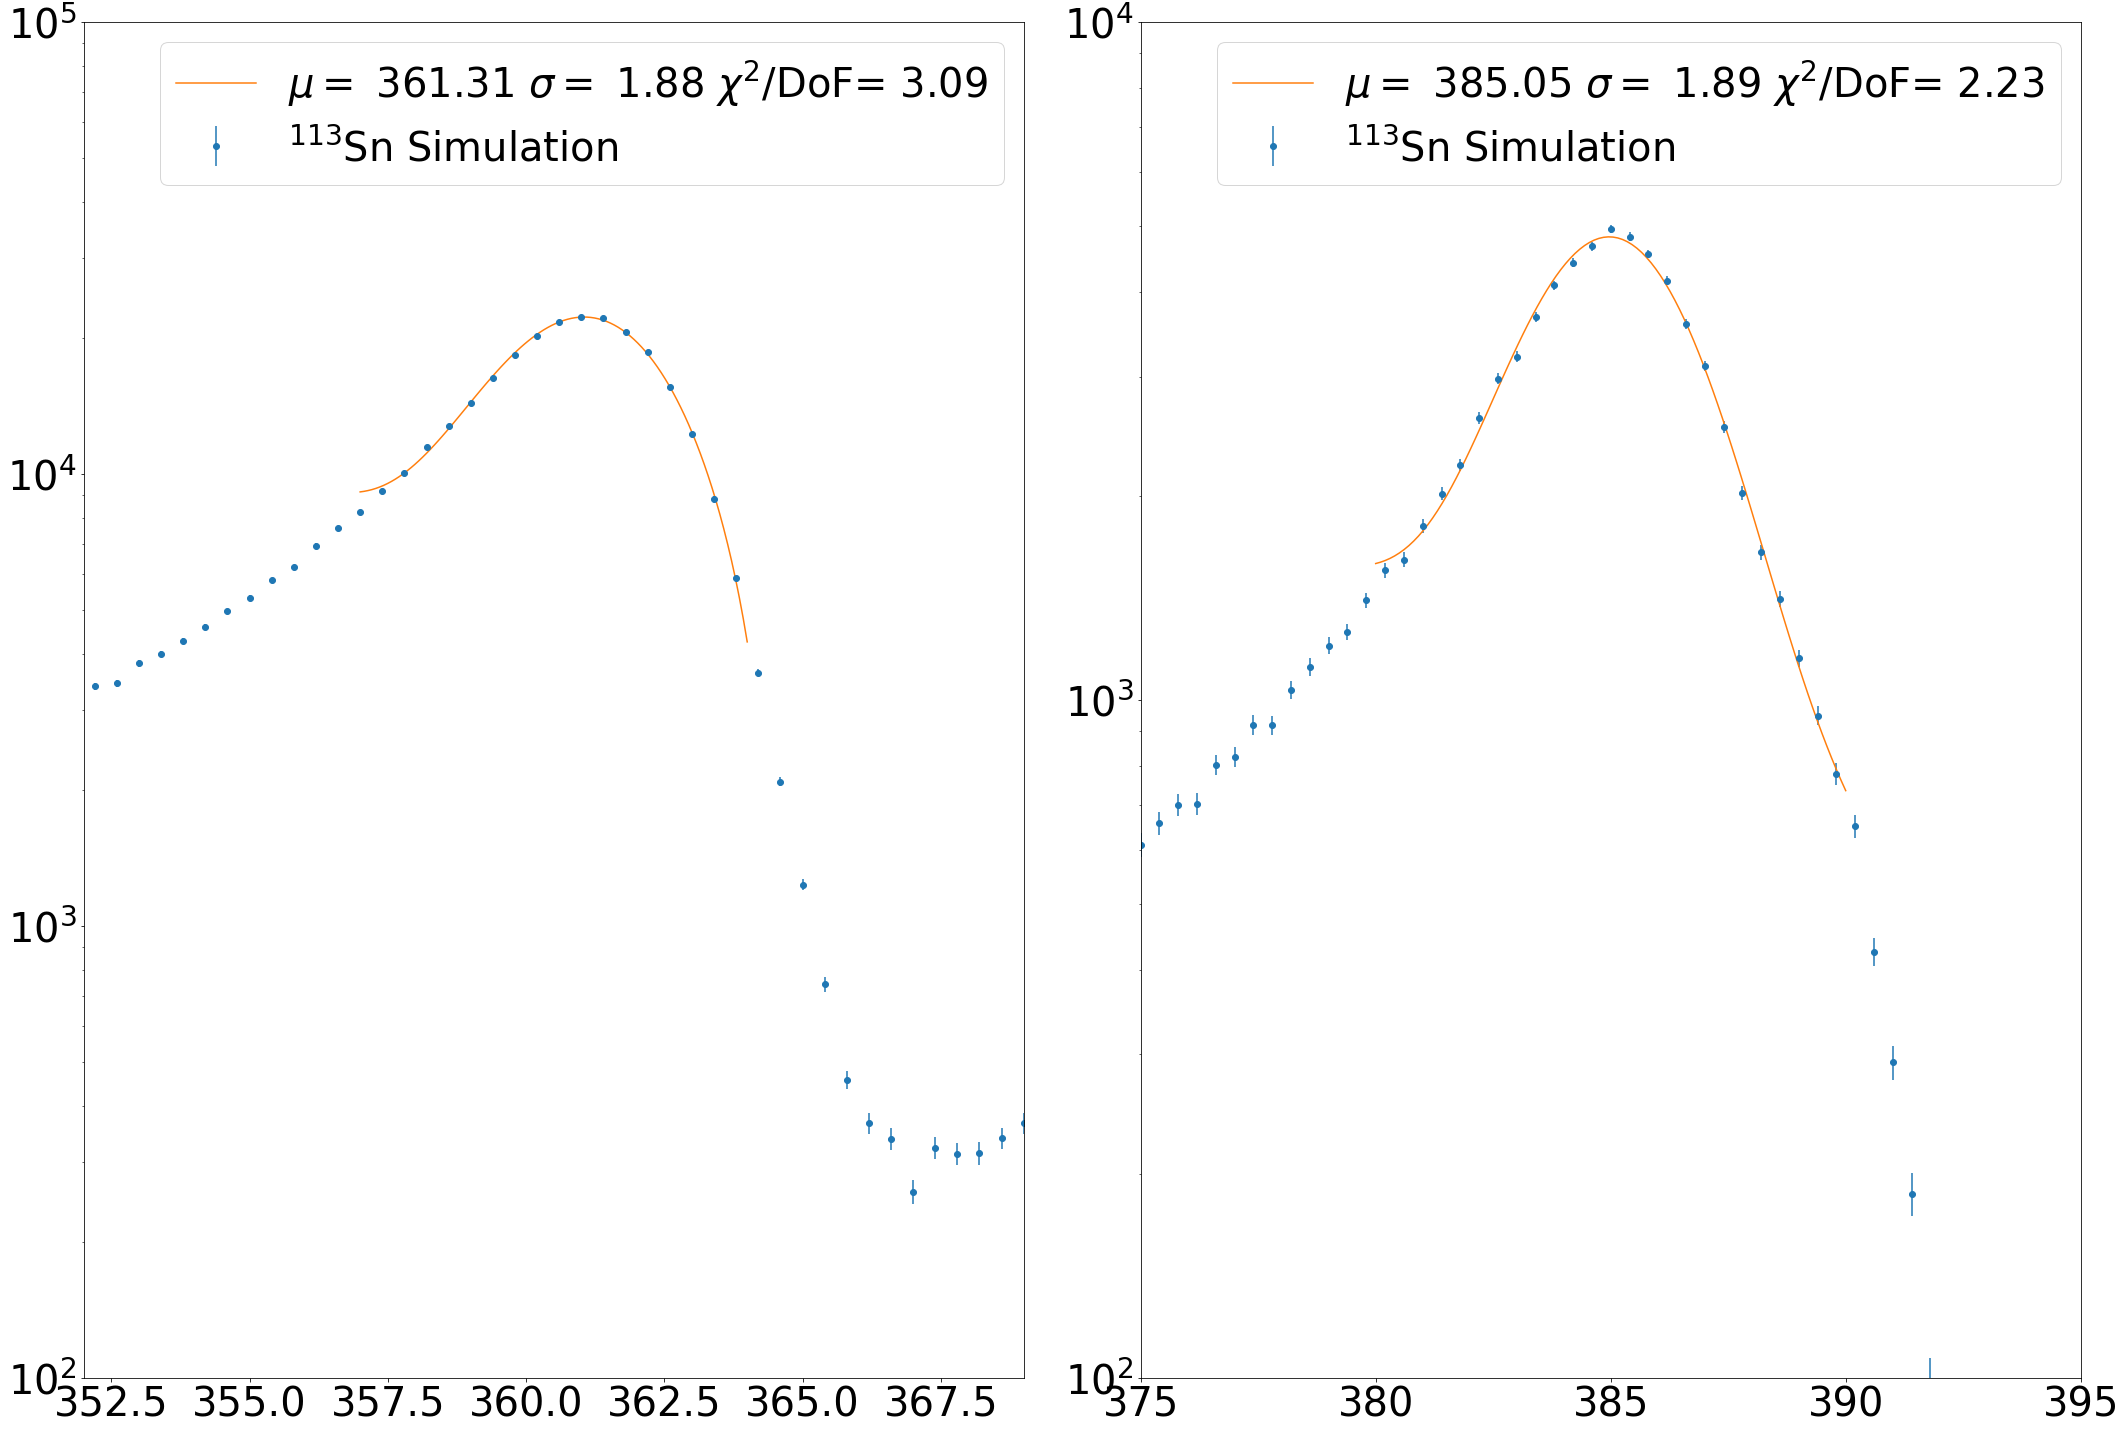

In [11]:
bd,ch=0,6
fs=40
xdata,ydata=[],[]
##################### Sn simulation##########################################
hist,bins=np.histogram(pd.sim_single_pixel(snsim,bd,ch)['energy'],bins=2000,range=[0,800])
bins=pd.cbins(bins)
fig,(ax1,ax2)=plt.subplots(1, 2,figsize=(30,20))
ax1.errorbar(bins,hist,np.sqrt(hist),fmt='o',label=r'$^{113}$Sn Simulation')
ax2.errorbar(bins,hist,np.sqrt(hist),fmt='o',label=r'$^{113}$Sn Simulation')
ax1.set_yscale('log')
ax2.set_yscale('log')
ax1.tick_params(labelsize=fs)
ax2.tick_params(labelsize=fs)

###363 lin
beg,end=357,364
fitbins,fithist=bins[pd.land(bins>beg,bins<end)],hist[pd.land(bins>beg,bins<end)]
weights=np.sqrt(fithist)
pars=[np.amax(fithist),fitbins[np.argmax(fithist)],2]
pars,vrs=curve_fit(gauss,fitbins,fithist,p0=pars,sigma=weights)
pars2=[np.amax(fithist),fitbins[np.argmax(fithist)],2,0,0]
pars2,vrs2=curve_fit(lingauss,fitbins,fithist,p0=pars2,sigma=weights)
vrs=np.sqrt(np.diag(vrs))
vrs2=np.sqrt(np.diag(vrs2))
xdata.append([pars[0],pars[1],vrs[1],pars2[0],pars2[1],vrs2[1]])
x=np.linspace(beg,end,100)
chi=np.sum(np.square(fithist-gauss(fitbins,*pars))/(fithist))/(len(fitbins)-len(pars))
chi2=np.sum(np.square(fithist-lingauss(fitbins,*pars2))/(fithist))/(len(fitbins)-len(pars2))
#ax1.plot(x,gauss(x,*pars),label=r'$\mu =$ %0.2f $\sigma =$ %0.2f $\chi^2$/DoF= %0.2f'%(pars[1],pars[2],chi))
ax1.plot(x,lingauss(x,*pars2),label=r'$\mu =$ %0.2f $\sigma =$ %0.2f $\chi^2$/DoF= %0.2f'%(pars2[1],pars2[2],chi2))
ax1.set_xlim(beg-5,end+5)
ax1.set_ylim(1e2,1e5)
ax1.legend(fontsize=fs)
###363 line
beg,end=380,390                                                                  
fitbins,fithist=bins[pd.land(bins>beg,bins<end)],hist[pd.land(bins>beg,bins<end)]
weights=np.sqrt(fithist)
pars=[np.amax(fithist),fitbins[np.argmax(fithist)],2]
pars,vrs=curve_fit(gauss,fitbins,fithist,p0=pars,sigma=weights)
pars2=[np.amax(fithist),fitbins[np.argmax(fithist)],2,0,0]
pars2,vrs2=curve_fit(lingauss,fitbins,fithist,p0=pars2,sigma=weights)
vrs=np.sqrt(np.diag(vrs))
vrs2=np.sqrt(np.diag(vrs2))
xdata.append([pars[0],pars[1],vrs[1],pars2[0],pars2[1],vrs2[1]])
x=np.linspace(beg,end,100)
chi=np.sum(np.square(fithist-gauss(fitbins,*pars))/(fithist))/(len(fitbins)-len(pars))
chi2=np.sum(np.square(fithist-lingauss(fitbins,*pars2))/(fithist))/(len(fitbins)-len(pars2))
#ax2.plot(x,gauss(x,*pars),label=r'$\mu =$ %0.2f $\sigma =$ %0.2f $\chi^2$/DoF= %0.2f'%(pars[1],pars[2],chi))
ax2.plot(x,lingauss(x,*pars2),label=r'$\mu =$ %0.2f $\sigma =$ %0.2f $\chi^2$/DoF= %0.2f'%(pars2[1],pars2[2],chi2))
ax2.set_xlim(beg-5,end+5)
ax2.set_ylim(1e2,1e4)
ax2.legend(fontsize=fs)
fig.tight_layout()
plt.show()


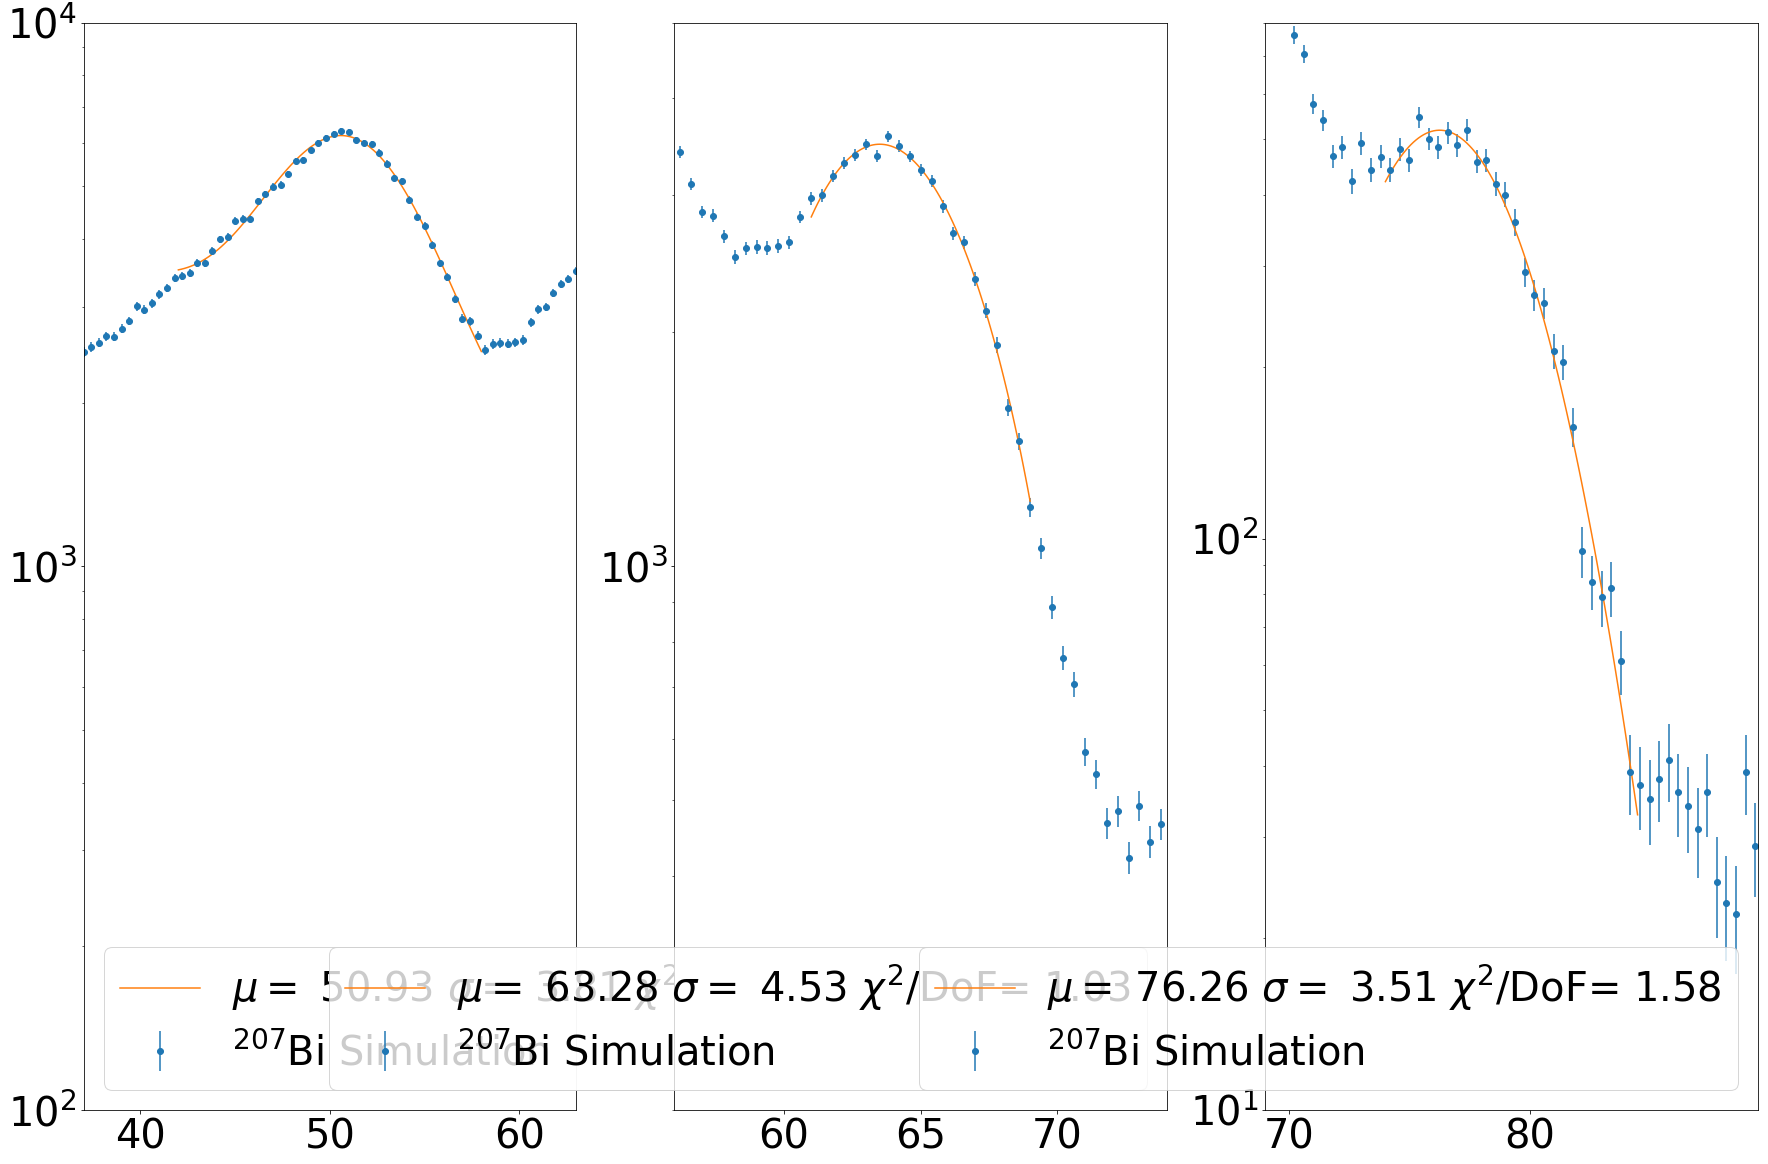

In [12]:
##################### Bi simulation##########################################
hist,bins=np.histogram(pd.sim_single_pixel(bisim,bd,ch)['energy'],bins=2000,range=[0,800])
bins=pd.cbins(bins)
fig,(ax1,ax2,ax3)=plt.subplots(1, 3,figsize=(30,20))
ax1.errorbar(bins,hist,np.sqrt(hist),fmt='o',label=r'$^{207}$Bi Simulation')
ax2.errorbar(bins,hist,np.sqrt(hist),fmt='o',label=r'$^{207}$Bi Simulation')
ax3.errorbar(bins,hist,np.sqrt(hist),fmt='o',label=r'$^{207}$Bi Simulation')
ax1.set_yscale('log')
ax2.set_yscale('log')
ax3.set_yscale('log')
ax1.tick_params(labelsize=fs)
ax2.tick_params(labelsize=fs)
ax3.tick_params(labelsize=fs)

###53 line
beg,end=42,58                                                                  
fitbins,fithist=bins[pd.land(bins>beg,bins<end)],hist[pd.land(bins>beg,bins<end)]
weights=np.sqrt(fithist)
pars=[np.amax(fithist),fitbins[np.argmax(fithist)],2]
pars,vrs=curve_fit(gauss,fitbins,fithist,p0=pars,sigma=weights)
pars2=[np.amax(fithist),fitbins[np.argmax(fithist)],2,0,0]
pars2,vrs2=curve_fit(lingauss,fitbins,fithist,p0=pars2,sigma=weights)
vrs=np.sqrt(np.diag(vrs))
vrs2=np.sqrt(np.diag(vrs2))
xdata.append([pars[0],pars[1],vrs[1],pars2[0],pars2[1],vrs2[1]])
x=np.linspace(beg,end,100)
chi=np.sum(np.square(fithist-gauss(fitbins,*pars))/(fithist))/(len(fitbins)-len(pars))
chi2=np.sum(np.square(fithist-lingauss(fitbins,*pars2))/(fithist))/(len(fitbins)-len(pars2))
#ax1.plot(x,gauss(x,*pars),label=r'$\mu =$ %0.2f $\sigma =$ %0.2f $\chi^2$/DoF= %0.2f'%(pars[1],pars[2],chi))
ax1.plot(x,lingauss(x,*pars2),label=r'$\mu =$ %0.2f $\sigma =$ %0.2f $\chi^2$/DoF= %0.2f'%(pars2[1],pars2[2],chi2))
ax1.set_xlim(beg-5,end+5)
ax1.set_ylim(1e2,1e4)
ax1.legend(fontsize=fs)

###66 line
beg,end=61,69                                                                  
fitbins,fithist=bins[pd.land(bins>beg,bins<end)],hist[pd.land(bins>beg,bins<end)]
weights=np.sqrt(fithist)
pars=[np.amax(fithist),fitbins[np.argmax(fithist)],2]
pars,vrs=curve_fit(gauss,fitbins,fithist,p0=pars,sigma=weights)
pars2=[np.amax(fithist),fitbins[np.argmax(fithist)],2,0,0]
pars2,vrs2=curve_fit(lingauss,fitbins,fithist,p0=pars2,sigma=weights)
vrs=np.sqrt(np.diag(vrs))
vrs2=np.sqrt(np.diag(vrs2))
xdata.append([pars[0],pars[1],vrs[1],pars2[0],pars2[1],vrs2[1]])
x=np.linspace(beg,end,100)
chi=np.sum(np.square(fithist-gauss(fitbins,*pars))/(fithist))/(len(fitbins)-len(pars))
chi2=np.sum(np.square(fithist-lingauss(fitbins,*pars2))/(fithist))/(len(fitbins)-len(pars2))
#ax2.plot(x,gauss(x,*pars),label=r'$\mu =$ %0.2f $\sigma =$ %0.2f $\chi^2$/DoF= %0.2f'%(pars[1],pars[2],chi))
ax2.plot(x,lingauss(x,*pars2),label=r'$\mu =$ %0.2f $\sigma =$ %0.2f $\chi^2$/DoF= %0.2f'%(pars2[1],pars2[2],chi2))
ax2.set_xlim(beg-5,end+5)
ax2.set_ylim(2e2,5e3)
ax2.legend(fontsize=fs)

###77 line
beg,end=74,84.5                                                                 
fitbins,fithist=bins[pd.land(bins>beg,bins<end)],hist[pd.land(bins>beg,bins<end)]
weights=np.sqrt(fithist)
pars=[np.amax(fithist),fitbins[np.argmax(fithist)],2]
pars,vrs=curve_fit(gauss,fitbins,fithist,p0=pars,sigma=weights)
pars2=[np.amax(fithist),fitbins[np.argmax(fithist)],2,0,0]
pars2,vrs2=curve_fit(lingauss,fitbins,fithist,p0=pars2,sigma=weights,maxfev=120000)
vrs=np.sqrt(np.diag(vrs))
vrs2=np.sqrt(np.diag(vrs2))
xdata.append([pars[0],pars[1],vrs[1],pars[0],pars[1],vrs2[1]])
x=np.linspace(beg,end,100)
chi=np.sum(np.square(fithist-gauss(fitbins,*pars))/(fithist))/(len(fitbins)-len(pars))
chi2=np.sum(np.square(fithist-lingauss(fitbins,*pars2))/(fithist))/(len(fitbins)-len(pars2))
ax3.plot(x,gauss(x,*pars),label=r'$\mu =$ %0.2f $\sigma =$ %0.2f $\chi^2$/DoF= %0.2f'%(pars[1],pars[2],chi))
#ax3.plot(x,lingauss(x,*pars2),label=r'$\mu =$ %0.2f $\sigma =$ %0.2f $\chi^2$/DoF= %0.2f'%(pars2[1],pars2[2],chi2))
ax3.set_xlim(beg-5,end+5)
ax3.set_ylim(1e1,8e2)
ax3.legend(fontsize=fs)
plt.show()

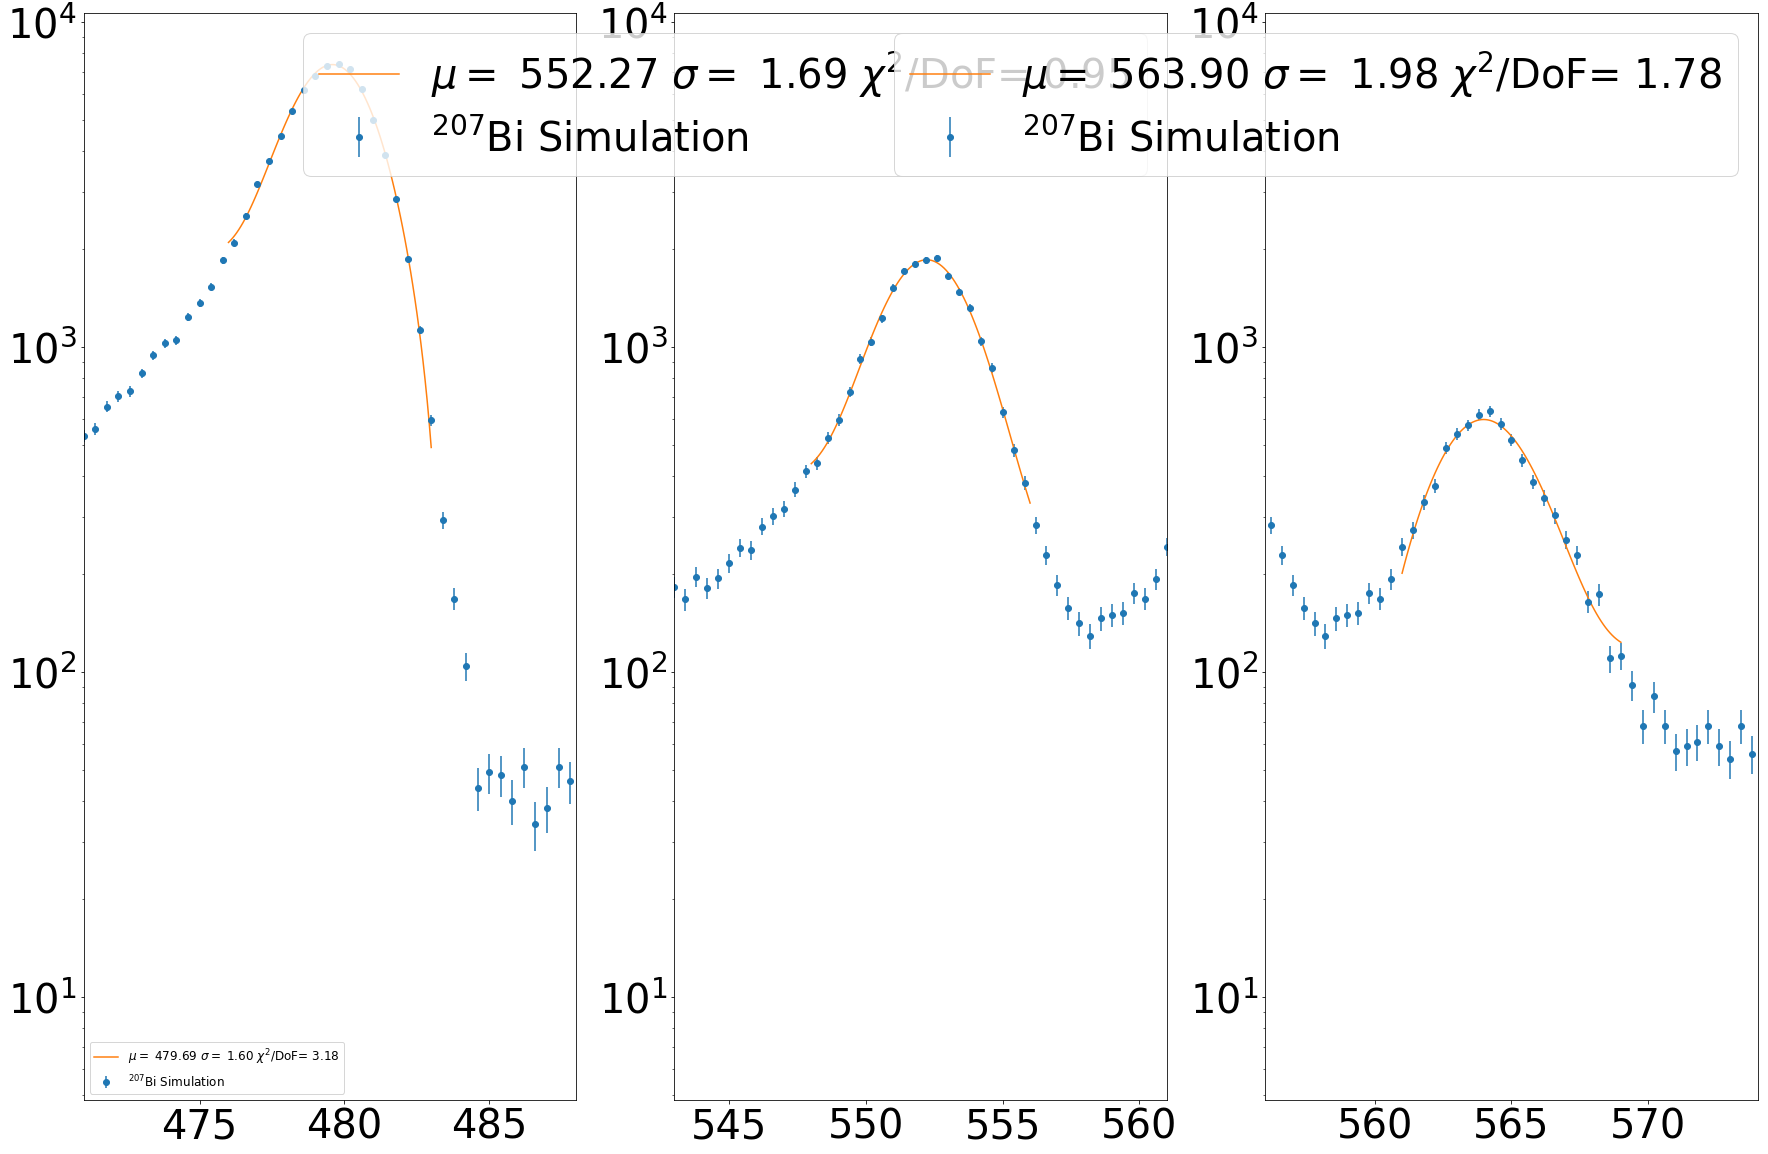

In [13]:
##################### Bi simulation##########################################
hist,bins=np.histogram(pd.sim_single_pixel(bisim,bd,ch)['energy'],bins=2000,range=[0,800])
bins=pd.cbins(bins)
fig,(ax1,ax2,ax3)=plt.subplots(1, 3,figsize=(30,20))
ax1.errorbar(bins,hist,np.sqrt(hist),fmt='o',label=r'$^{207}$Bi Simulation')
ax2.errorbar(bins,hist,np.sqrt(hist),fmt='o',label=r'$^{207}$Bi Simulation')
ax3.errorbar(bins,hist,np.sqrt(hist),fmt='o',label=r'$^{207}$Bi Simulation')
ax1.set_yscale('log')
ax2.set_yscale('log')
ax3.set_yscale('log')
ax1.tick_params(labelsize=fs)
ax2.tick_params(labelsize=fs)
ax3.tick_params(labelsize=fs)

###363 line
beg,end=476,483
fitbins,fithist=bins[pd.land(bins>beg,bins<end)],hist[pd.land(bins>beg,bins<end)]
weights=np.sqrt(fithist)
pars=[np.amax(fithist),fitbins[np.argmax(fithist)],2]
pars,vrs=curve_fit(gauss,fitbins,fithist,p0=pars,sigma=weights)
pars2=[np.amax(fithist),fitbins[np.argmax(fithist)],2,0,0]
pars2,vrs2=curve_fit(lingauss,fitbins,fithist,p0=pars2,sigma=weights)
vrs=np.sqrt(np.diag(vrs))
vrs2=np.sqrt(np.diag(vrs2))
xdata.append([pars[0],pars[1],vrs[1],pars2[0],pars2[1],vrs2[1]])
x=np.linspace(beg,end,100)
chi=np.sum(np.square(fithist-gauss(fitbins,*pars))/(fithist))/(len(fitbins)-len(pars))
chi2=np.sum(np.square(fithist-lingauss(fitbins,*pars2))/(fithist))/(len(fitbins)-len(pars2))
#ax1.plot(x,gauss(x,*pars),label=r'$\mu =$ %0.2f $\sigma =$ %0.2f $\chi^2$/DoF= %0.2f'%(pars[1],pars[2],chi))
ax1.plot(x,lingauss(x,*pars2),label=r'$\mu =$ %0.2f $\sigma =$ %0.2f $\chi^2$/DoF= %0.2f'%(pars2[1],pars2[2],chi2))
ax1.set_xlim(beg-5,end+5)

ax1.legend(fontsize=12)

###553 line
beg,end=548,556                                                                  
fitbins,fithist=bins[pd.land(bins>beg,bins<end)],hist[pd.land(bins>beg,bins<end)]
weights=np.sqrt(fithist)
pars=[np.amax(fithist),fitbins[np.argmax(fithist)],2]
pars,vrs=curve_fit(gauss,fitbins,fithist,p0=pars,sigma=weights)
pars2=[np.amax(fithist),fitbins[np.argmax(fithist)],2,0,0]
pars2,vrs2=curve_fit(lingauss,fitbins,fithist,p0=pars2,sigma=weights)
vrs=np.sqrt(np.diag(vrs))
vrs2=np.sqrt(np.diag(vrs2))
xdata.append([pars[0],pars[1],vrs[1],pars2[0],pars2[1],vrs2[1]])
x=np.linspace(beg,end,100)
chi=np.sum(np.square(fithist-gauss(fitbins,*pars))/(fithist))/(len(fitbins)-len(pars))
chi2=np.sum(np.square(fithist-lingauss(fitbins,*pars2))/(fithist))/(len(fitbins)-len(pars2))
#ax2.plot(x,gauss(x,*pars),label=r'$\mu =$ %0.2f $\sigma =$ %0.2f $\chi^2$/DoF= %0.2f'%(pars[1],pars[2],chi))
ax2.plot(x,lingauss(x,*pars2),label=r'$\mu =$ %0.2f $\sigma =$ %0.2f $\chi^2$/DoF= %0.2f'%(pars2[1],pars2[2],chi2))
ax2.set_xlim(beg-5,end+5)

ax2.legend(fontsize=fs)


###553 line
beg,end=561,569                                                                  
fitbins,fithist=bins[pd.land(bins>beg,bins<end)],hist[pd.land(bins>beg,bins<end)]
weights=np.sqrt(fithist)
pars=[np.amax(fithist),fitbins[np.argmax(fithist)],2]
pars,vrs=curve_fit(gauss,fitbins,fithist,p0=pars,sigma=weights)
pars2=[np.amax(fithist),fitbins[np.argmax(fithist)],2,0,0]
pars2,vrs2=curve_fit(lingauss,fitbins,fithist,p0=pars2,sigma=weights)
vrs=np.sqrt(np.diag(vrs))
vrs2=np.sqrt(np.diag(vrs2))
xdata.append([pars[0],pars[1],vrs[1],pars[0],pars[1],vrs2[1]])
x=np.linspace(beg,end,100)
chi=np.sum(np.square(fithist-gauss(fitbins,*pars))/(fithist))/(len(fitbins)-len(pars))
chi2=np.sum(np.square(fithist-lingauss(fitbins,*pars2))/(fithist))/(len(fitbins)-len(pars2))
#ax3.plot(x,gauss(x,*pars),label=r'$\mu =$ %0.2f $\sigma =$ %0.2f $\chi^2$/DoF= %0.2f'%(pars[1],pars[2],chi))
ax3.plot(x,lingauss(x,*pars2),label=r'$\mu =$ %0.2f $\sigma =$ %0.2f $\chi^2$/DoF= %0.2f'%(pars2[1],pars2[2],chi2))
ax3.set_xlim(beg-5,end+5)

ax3.legend(fontsize=fs)

plt.savefig('bi-simfit.pdf',format='pdf')
plt.show()

hist,bins=np.histogram(pd.sim_single_pixel(cesim,bd,ch)['energy'],bins=2000,range=[0,800])
bins=pd.cbins(bins)
fig,(ax1,ax2)=plt.subplots(1, 2,figsize=(30,20))
ax1.errorbar(bins,hist,np.sqrt(hist),fmt='o',label=r'$^{139}$Ce Simulation')
ax2.errorbar(bins,hist,np.sqrt(hist),fmt='o',label=r'$^{139}$Ce Simulation')
ax1.set_yscale('log')
ax2.set_yscale('log')
ax1.tick_params(labelsize=fs)
ax2.tick_params(labelsize=fs)

#####Ce data######
beg,end=121,126
fitbins,fithist=bins[pd.land(bins>beg,bins<end)],hist[pd.land(bins>beg,bins<end)]
weights=np.sqrt(fithist)
pars=[np.amax(fithist),fitbins[np.argmax(fithist)],2]
pars,vrs=curve_fit(gauss,fitbins,fithist,p0=pars,sigma=weights)
pars2=[np.amax(fithist),fitbins[np.argmax(fithist)],2,0,0]
pars2,vrs2=curve_fit(lingauss,fitbins,fithist,p0=pars2,sigma=weights)
vrs=np.sqrt(np.diag(vrs))
vrs2=np.sqrt(np.diag(vrs2))
xdata.append([pars[0],pars[1],vrs[1],pars2[0],pars2[1],vrs2[1]])
x=np.linspace(beg,end,100)
chi=np.sum(np.square(fithist-gauss(fitbins,*pars))/(fithist))/(len(fitbins)-len(pars))
chi2=np.sum(np.square(fithist-lingauss(fitbins,*pars2))/(fithist))/(len(fitbins)-len(pars2))
#ax1.plot(x,gauss(x,*pars),label=r'$\mu =$ %0.2f $\sigma =$ %0.2f $\chi^2$/DoF= %0.2f'%(pars[1],pars[2],chi))
ax1.plot(x,lingauss(x,*pars2),label=r'$\mu =$ %0.2f $\sigma =$ %0.2f $\chi^2$/DoF= %0.2f'%(pars2[1],pars2[2],chi2))
ax1.set_xlim(beg-5,end+5)
ax1.set_ylim(1e2,1e5)
ax1.legend(fontsize=fs)
###363 line
beg,end=154,159                                                                  
fitbins,fithist=bins[pd.land(bins>beg,bins<end)],hist[pd.land(bins>beg,bins<end)]
weights=np.sqrt(fithist)
pars=[np.amax(fithist),fitbins[np.argmax(fithist)],2]
pars,vrs=curve_fit(gauss,fitbins,fithist,p0=pars,sigma=weights)
pars2=[np.amax(fithist),fitbins[np.argmax(fithist)],2,0,0]
pars2,vrs2=curve_fit(lingauss,fitbins,fithist,p0=pars2,sigma=weights)
vrs=np.sqrt(np.diag(vrs))
vrs2=np.sqrt(np.diag(vrs2))
xdata.append([pars[0],pars[1],vrs[1],pars2[0],pars2[1],vrs2[1]])
x=np.linspace(beg,end,100)
chi=np.sum(np.square(fithist-gauss(fitbins,*pars))/(fithist))/(len(fitbins)-len(pars))
chi2=np.sum(np.square(fithist-lingauss(fitbins,*pars2))/(fithist))/(len(fitbins)-len(pars2))
#ax2.plot(x,gauss(x,*pars),label=r'$\mu =$ %0.2f $\sigma =$ %0.2f $\chi^2$/DoF= %0.2f'%(pars[1],pars[2],chi))
ax2.plot(x,lingauss(x,*pars2),label=r'$\mu =$ %0.2f $\sigma =$ %0.2f $\chi^2$/DoF= %0.2f'%(pars2[1],pars2[2],chi2))
ax2.set_xlim(beg-5,end+5)
ax2.set_ylim(1e2,1e4)
ax2.legend(fontsize=fs)
fig.tight_layout()
plt.show()


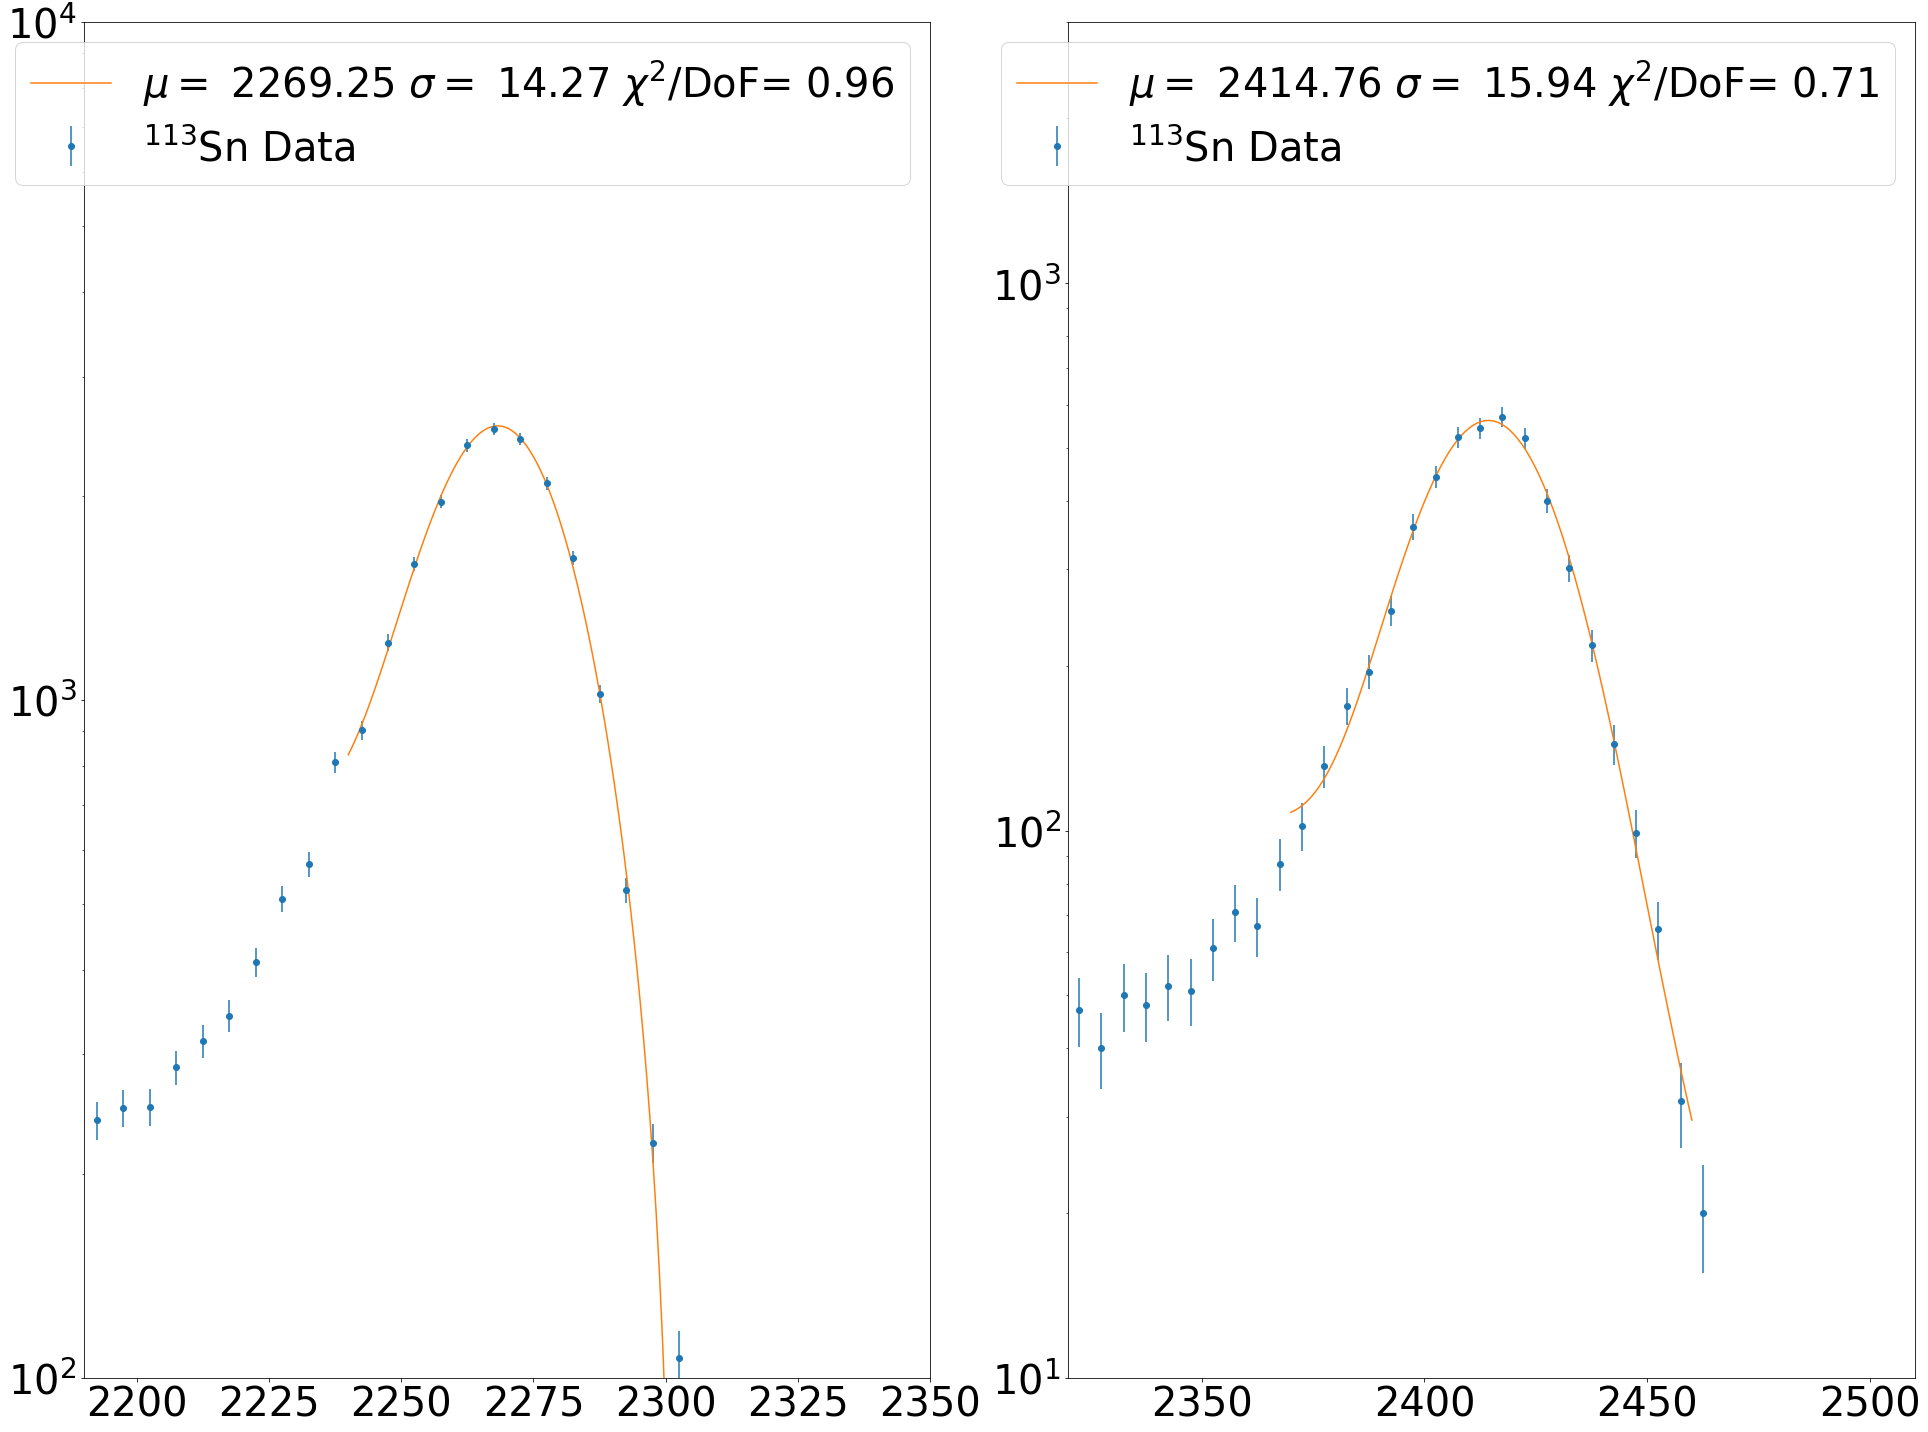

In [14]:
bd,ch=0,6
##################### Sn data##########################################
hist,bins=np.histogram(pd.single_pixel(sndata,bd,ch)['energy'],bins=1000,range=[0,5000])
bins=pd.cbins(bins)
fig,(ax1,ax2)=plt.subplots(1, 2,figsize=(30,20))
ax1.errorbar(bins,hist,np.sqrt(hist),fmt='o',label=r'$^{113}$Sn Data')
ax2.errorbar(bins,hist,np.sqrt(hist),fmt='o',label=r'$^{113}$Sn Data')
ax1.set_yscale('log')
ax2.set_yscale('log')
ax1.tick_params(labelsize=fs)
ax2.tick_params(labelsize=fs)

###363 line
beg,end=2240,2300                                                                  
fitbins,fithist=bins[pd.land(bins>beg,bins<end)],hist[pd.land(bins>beg,bins<end)]
weights=np.sqrt(fithist)
pars=[np.amax(fithist),fitbins[np.argmax(fithist)],2]
pars,vrs=curve_fit(gauss,fitbins,fithist,p0=pars,sigma=weights)
pars2=[np.amax(fithist),fitbins[np.argmax(fithist)],2,0,0]
pars2,vrs2=curve_fit(lingauss,fitbins,fithist,p0=pars2,sigma=weights)
vrs=np.sqrt(np.diag(vrs))
vrs2=np.sqrt(np.diag(vrs2))
ydata.append([pars[0],pars[1],vrs[1],pars2[0],pars2[1],vrs2[1]])
x=np.linspace(beg,end,100)
chi=np.sum(np.square(fithist-gauss(fitbins,*pars))/(fithist))/(len(fitbins)-len(pars))
chi2=np.sum(np.square(fithist-lingauss(fitbins,*pars2))/(fithist))/(len(fitbins)-len(pars2))
ax1.plot(x,lingauss(x,*pars2),label=r'$\mu =$ %0.2f $\sigma =$ %0.2f $\chi^2$/DoF= %0.2f'%(pars2[1],pars2[2],chi2))
ax1.set_xlim(beg-50,end+50)
ax1.set_ylim(1e2,1e4)
ax1.legend(fontsize=fs)
###363 line
beg,end=2370,2460                                                                  
fitbins,fithist=bins[pd.land(bins>beg,bins<end)],hist[pd.land(bins>beg,bins<end)]
weights=np.sqrt(fithist)
pars=[np.amax(fithist),fitbins[np.argmax(fithist)],2]
pars,vrs=curve_fit(gauss,fitbins,fithist,p0=pars,sigma=weights)
pars2=[np.amax(fithist),fitbins[np.argmax(fithist)],2,0,0]
pars2,vrs2=curve_fit(lingauss,fitbins,fithist,p0=pars2,sigma=weights)
vrs=np.sqrt(np.diag(vrs))
vrs2=np.sqrt(np.diag(vrs2))
ydata.append([pars[0],pars[1],vrs[1],pars2[0],pars2[1],vrs2[1]])
x=np.linspace(beg,end,100)
chi=np.sum(np.square(fithist-gauss(fitbins,*pars))/(fithist))/(len(fitbins)-len(pars))
chi2=np.sum(np.square(fithist-lingauss(fitbins,*pars2))/(fithist))/(len(fitbins)-len(pars2))
ax2.plot(x,lingauss(x,*pars2),label=r'$\mu =$ %0.2f $\sigma =$ %0.2f $\chi^2$/DoF= %0.2f'%(pars2[1],pars2[2],chi2))
ax2.set_xlim(beg-50,end+50)
ax2.set_ylim(1e1,3e3)
ax2.legend(fontsize=fs)
fig.tight_layout()
plt.savefig('sn-datfit.pdf',format='pdf')
plt.show()


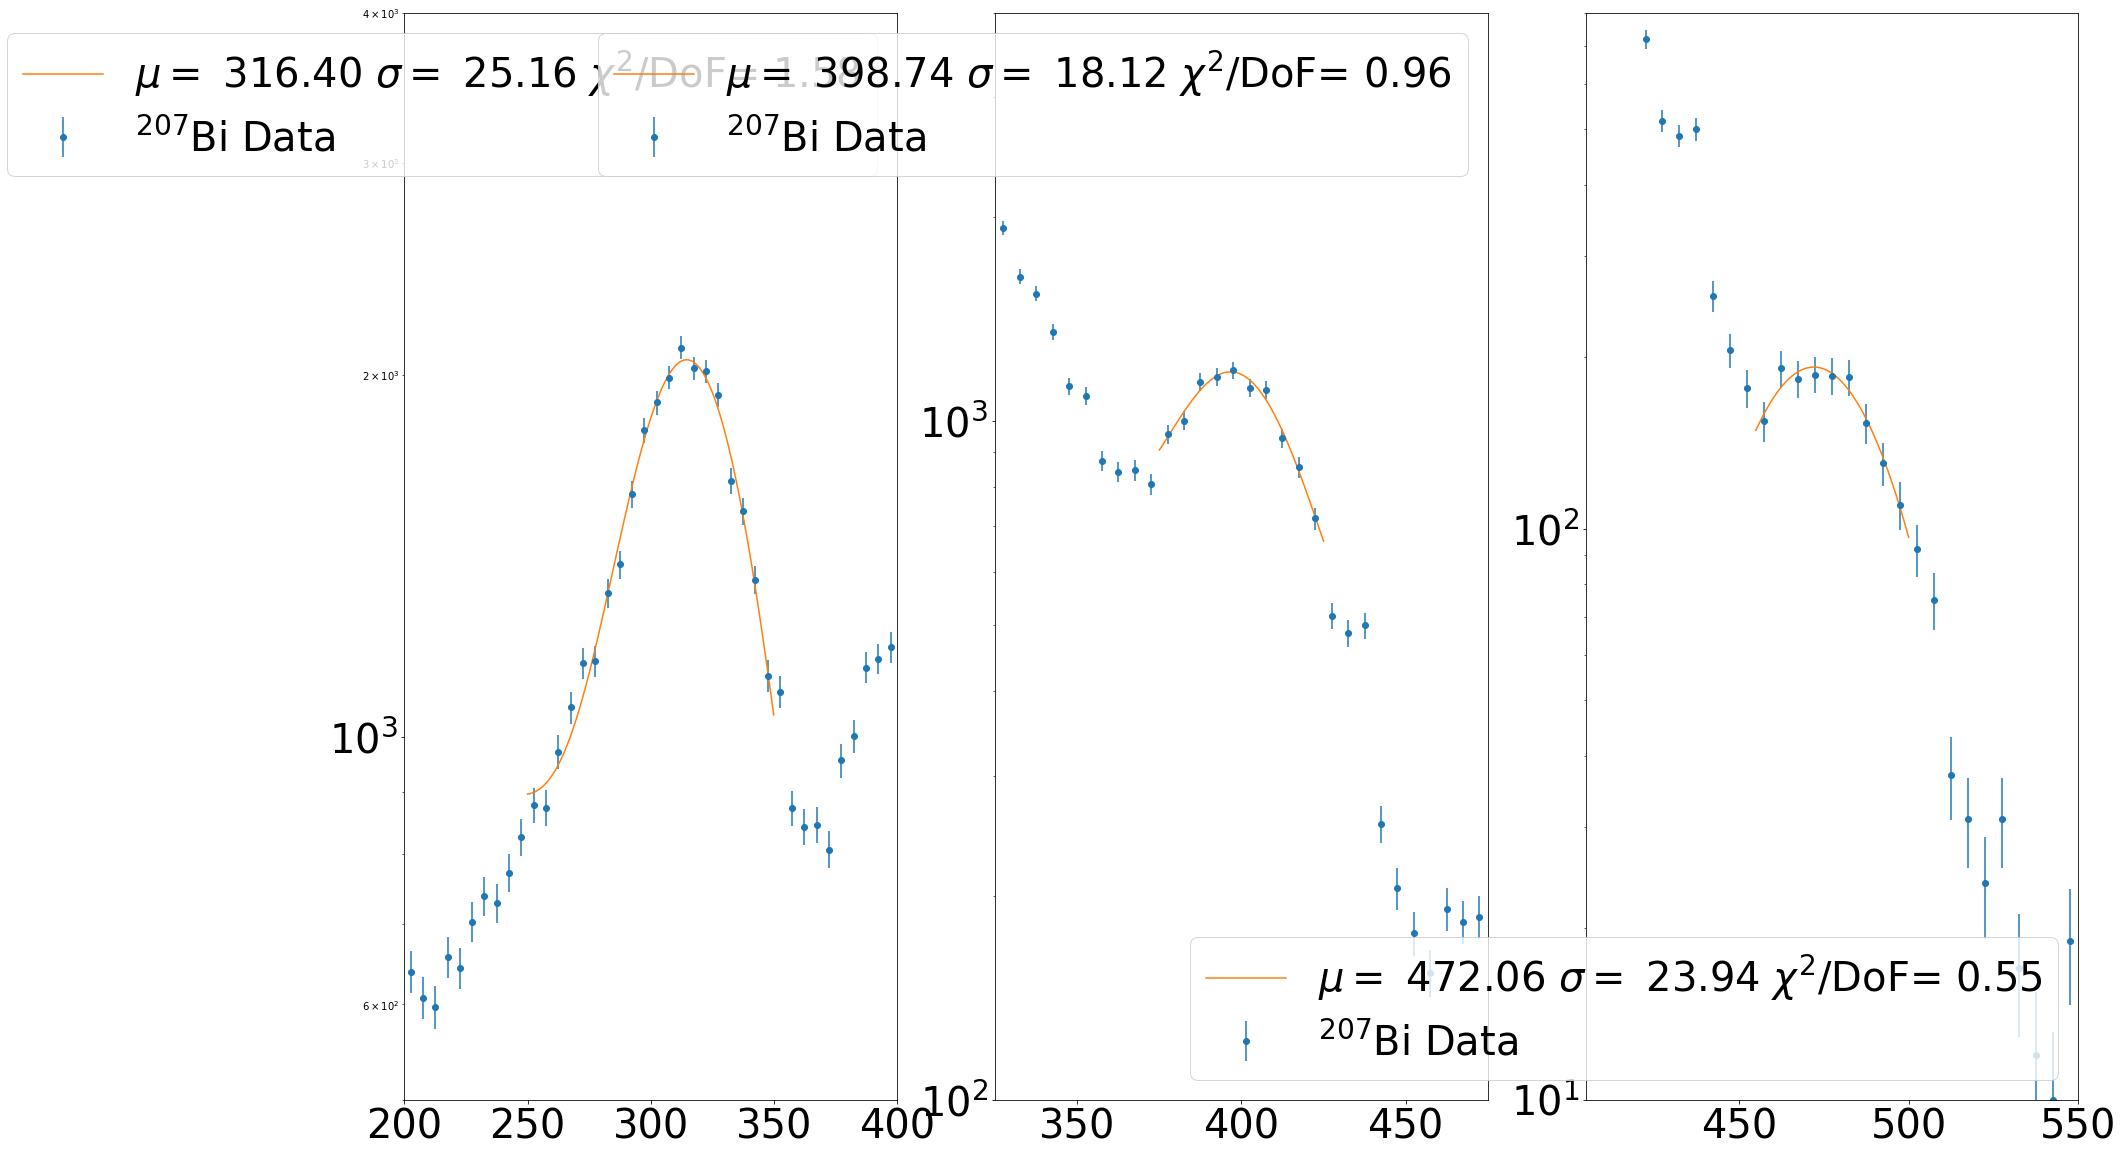

In [15]:
##################### Bi DATA##########################################
hist,bins=np.histogram(pd.single_pixel(bidata,bd,ch)['energy'],bins=1000,range=[0,5000])
bins=pd.cbins(bins)
fig,(ax1,ax2,ax3)=plt.subplots(1, 3,figsize=(30,20))
ax1.errorbar(bins,hist,np.sqrt(hist),fmt='o',label=r'$^{207}$Bi Data')
ax2.errorbar(bins,hist,np.sqrt(hist),fmt='o',label=r'$^{207}$Bi Data')
ax3.errorbar(bins,hist,np.sqrt(hist),fmt='o',label=r'$^{207}$Bi Data')
ax1.set_yscale('log')
ax2.set_yscale('log')
ax3.set_yscale('log')
ax1.tick_params(labelsize=fs)
ax2.tick_params(labelsize=fs)
ax3.tick_params(labelsize=fs)

###55 line
beg,end=250,350                                                                  
fitbins,fithist=bins[pd.land(bins>beg,bins<end)],hist[pd.land(bins>beg,bins<end)]
weights=np.sqrt(fithist)
pars=[np.amax(fithist),fitbins[np.argmax(fithist)],2]
pars,vrs=curve_fit(gauss,fitbins,fithist,p0=pars,sigma=weights)
pars2=[np.amax(fithist),fitbins[np.argmax(fithist)],2,0,0]
pars2,vrs2=curve_fit(lingauss,fitbins,fithist,p0=pars2,sigma=weights)
vrs=np.sqrt(np.diag(vrs))
vrs2=np.sqrt(np.diag(vrs2))
ydata.append([pars[0],pars[1],vrs[1],pars2[0],pars2[1],vrs2[1]])
x=np.linspace(beg,end,100)
chi=np.sum(np.square(fithist-gauss(fitbins,*pars))/(fithist))/(len(fitbins)-len(pars))
chi2=np.sum(np.square(fithist-lingauss(fitbins,*pars2))/(fithist))/(len(fitbins)-len(pars2))
#ax1.plot(x,gauss(x,*pars),label=r'$\mu =$ %0.2f $\sigma =$ %0.2f $\chi^2$/DoF= %0.2f'%(pars[1],pars[2],chi))
ax1.plot(x,lingauss(x,*pars2),label=r'$\mu =$ %0.2f $\sigma =$ %0.2f $\chi^2$/DoF= %0.2f'%(pars2[1],pars2[2],chi2))
ax1.set_xlim(beg-50,end+50)
ax1.set_ylim(5e2,4e3)
ax1.legend(fontsize=fs)

###66 line
beg,end=375,425                                                                  
fitbins,fithist=bins[pd.land(bins>beg,bins<end)],hist[pd.land(bins>beg,bins<end)]
weights=np.sqrt(fithist)
pars=[np.amax(fithist),fitbins[np.argmax(fithist)],2]
pars,vrs=curve_fit(gauss,fitbins,fithist,p0=pars,sigma=weights)
pars2=[np.amax(fithist),fitbins[np.argmax(fithist)],2,0,0]
pars2,vrs2=curve_fit(lingauss,fitbins,fithist,p0=pars2,sigma=weights)
vrs=np.sqrt(np.diag(vrs))
vrs2=np.sqrt(np.diag(vrs2))
ydata.append([pars[0],pars[1],vrs[1],pars2[0],pars2[1],vrs2[1]])
x=np.linspace(beg,end,100)
chi=np.sum(np.square(fithist-gauss(fitbins,*pars))/(fithist))/(len(fitbins)-len(pars))
chi2=np.sum(np.square(fithist-lingauss(fitbins,*pars2))/(fithist))/(len(fitbins)-len(pars2))
#ax2.plot(x,gauss(x,*pars),label=r'$\mu =$ %0.2f $\sigma =$ %0.2f $\chi^2$/DoF= %0.2f'%(pars[1],pars[2],chi))
ax2.plot(x,lingauss(x,*pars2),label=r'$\mu =$ %0.2f $\sigma =$ %0.2f $\chi^2$/DoF= %0.2f'%(pars2[1],pars2[2],chi2))
ax2.set_xlim(beg-50,end+50)
ax2.set_ylim(1e2,4e3)
ax2.legend(fontsize=fs)


###77 line
beg,end=455,500                                                                
fitbins,fithist=bins[pd.land(bins>beg,bins<end)],hist[pd.land(bins>beg,bins<end)]
weights=np.sqrt(fithist)
pars=[np.amax(fithist),fitbins[np.argmax(fithist)],2]
pars,vrs=curve_fit(gauss,fitbins,fithist,p0=pars,sigma=weights)
pars2=[np.amax(fithist),fitbins[np.argmax(fithist)],2,0,0]
pars2,vrs2=curve_fit(lingauss,fitbins,fithist,p0=pars2,sigma=weights,bounds=([0,0,0,-np.inf,0],[np.inf,np.inf,np.inf,0,np.inf]))
vrs=np.sqrt(np.diag(vrs))
vrs2=np.sqrt(np.diag(vrs2))
ydata.append([pars[0],pars[1],vrs[1],pars2[0],pars2[1],vrs2[1]])
x=np.linspace(beg,end,100)
chi=np.sum(np.square(fithist-gauss(fitbins,*pars))/(fithist))/(len(fitbins)-len(pars))
chi2=np.sum(np.square(fithist-lingauss(fitbins,*pars2))/(fithist))/(len(fitbins)-len(pars2))
#ax3.plot(x,gauss(x,*pars),label=r'$\mu =$ %0.2f $\sigma =$ %0.2f $\chi^2$/DoF= %0.2f'%(pars[1],pars[2],chi))
ax3.plot(x,lingauss(x,*pars2),label=r'$\mu =$ %0.2f $\sigma =$ %0.2f $\chi^2$/DoF= %0.2f'%(pars2[1],pars2[2],chi2))
ax3.set_xlim(beg-50,end+50)
ax3.set_ylim(1e1,8e2)
ax3.legend(fontsize=fs)

plt.savefig('bi-datfit.pdf',format='pdf')
plt.show()

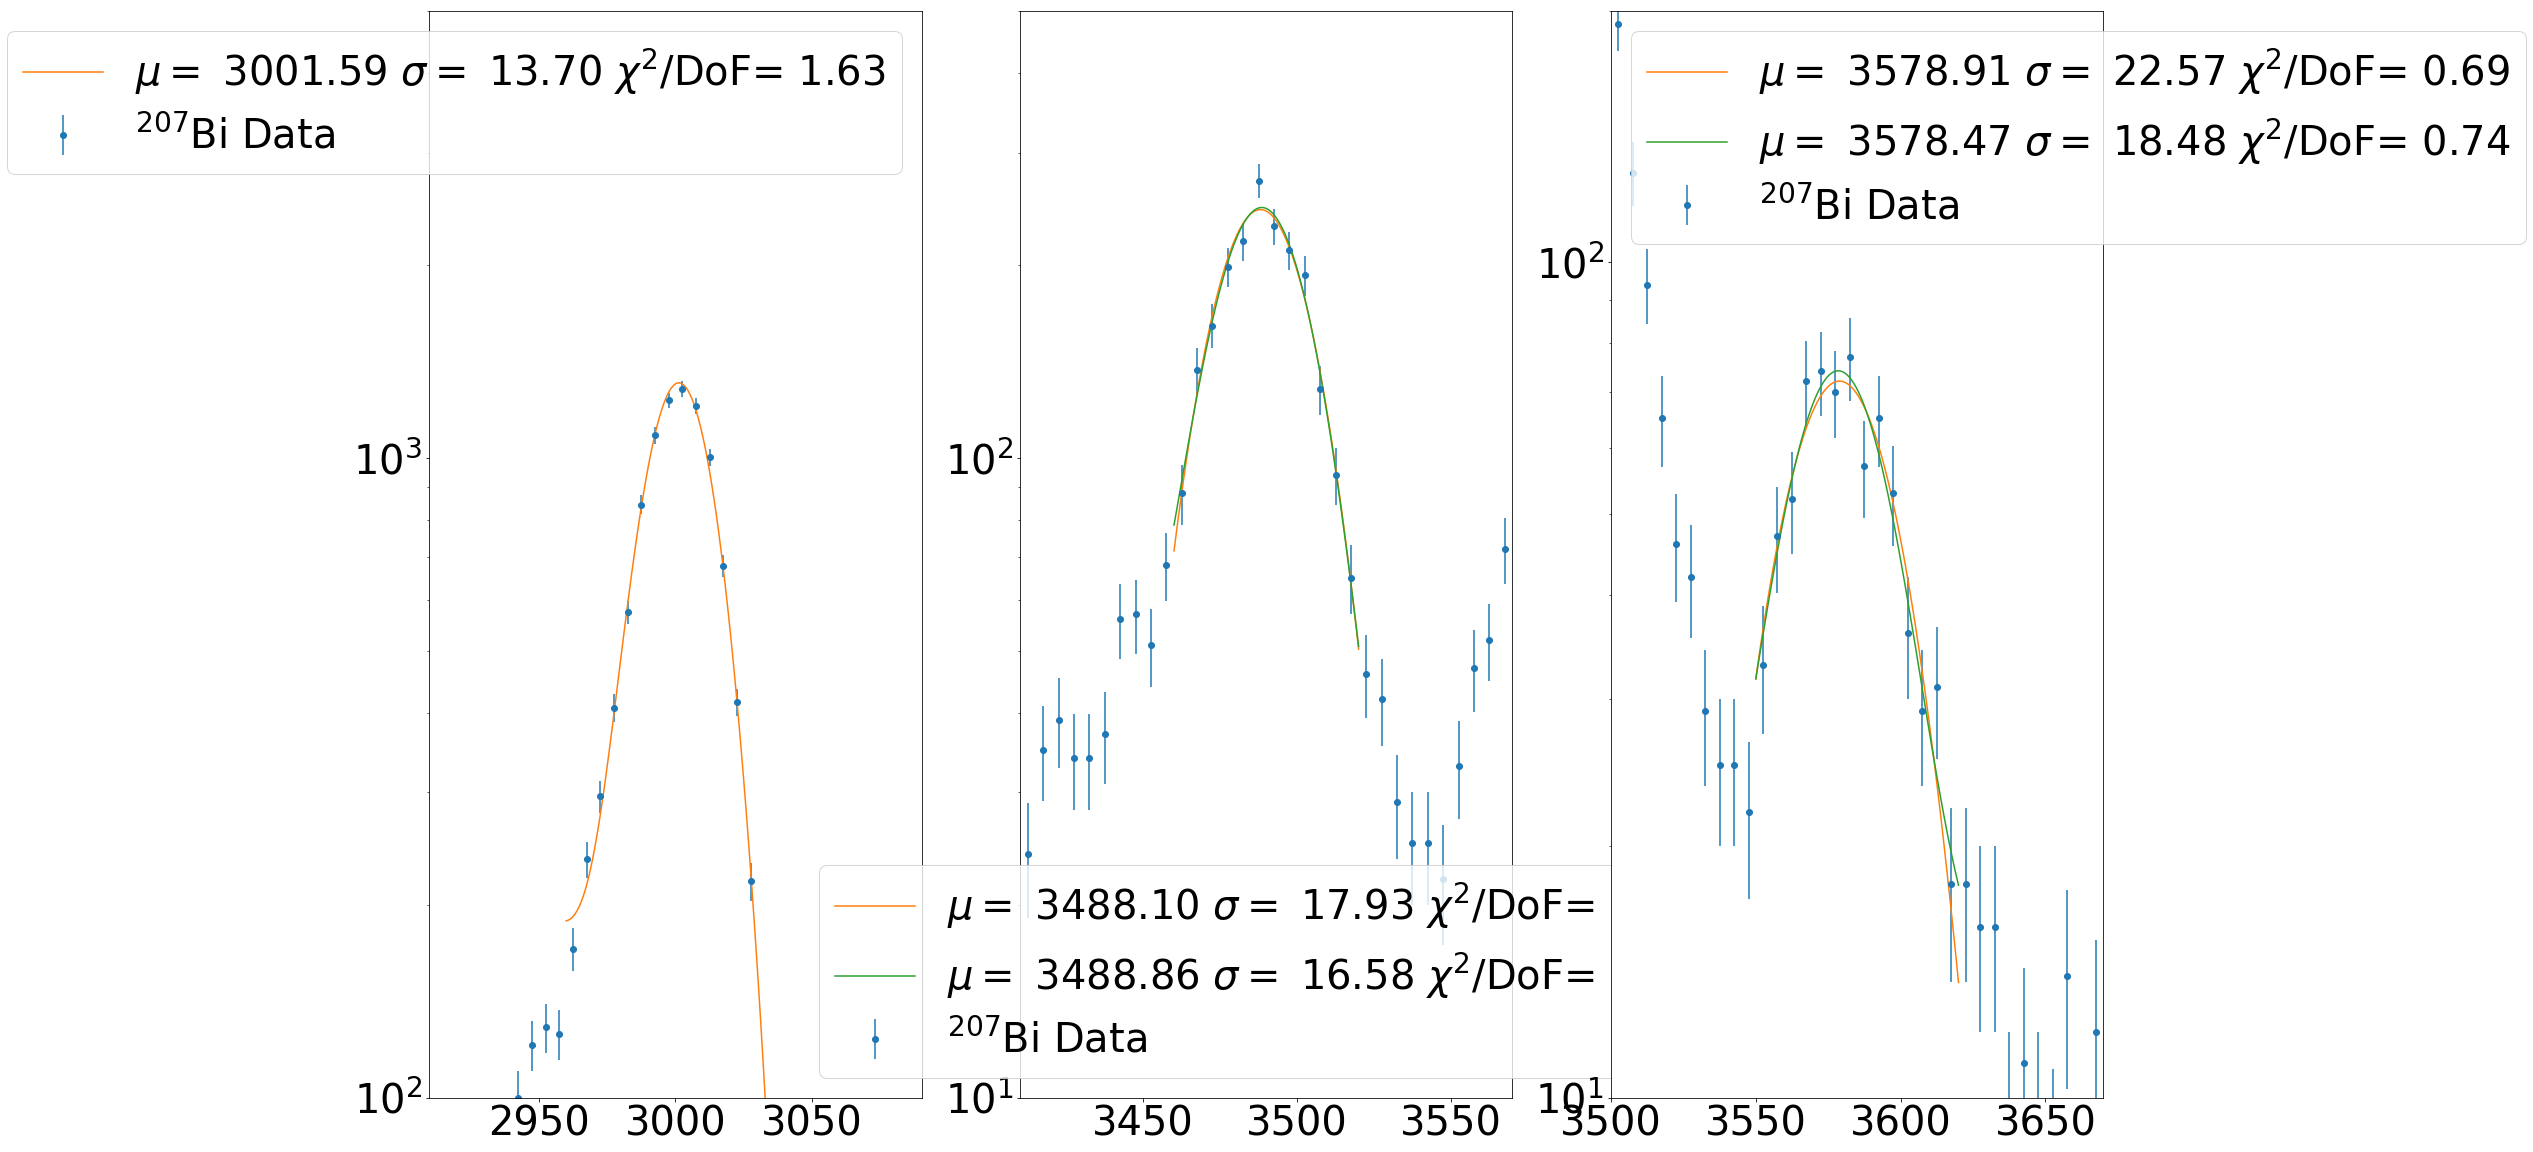

In [16]:
##################### Bi DATA##########################################
hist,bins=np.histogram(pd.single_pixel(bidata,bd,ch)['energy'],bins=1000,range=[0,5000])
bins=pd.cbins(bins)
fig,(ax1,ax2,ax3)=plt.subplots(1, 3,figsize=(30,20))
ax1.errorbar(bins,hist,np.sqrt(hist),fmt='o',label=r'$^{207}$Bi Data')
ax2.errorbar(bins,hist,np.sqrt(hist),fmt='o',label=r'$^{207}$Bi Data')
ax3.errorbar(bins,hist,np.sqrt(hist),fmt='o',label=r'$^{207}$Bi Data')
ax1.set_yscale('log')
ax2.set_yscale('log')
ax3.set_yscale('log')
ax1.tick_params(labelsize=fs)
ax2.tick_params(labelsize=fs)
ax3.tick_params(labelsize=fs)

###363 line
beg,end=2960,3040                                                                  
fitbins,fithist=bins[pd.land(bins>beg,bins<end)],hist[pd.land(bins>beg,bins<end)]
weights=np.sqrt(fithist)
pars=[np.amax(fithist),fitbins[np.argmax(fithist)],2]
pars,vrs=curve_fit(gauss,fitbins,fithist,p0=pars,sigma=weights)
pars2=[np.amax(fithist),fitbins[np.argmax(fithist)],2,0,0]
pars2,vrs2=curve_fit(lingauss,fitbins,fithist,p0=pars2,sigma=weights)
vrs=np.sqrt(np.diag(vrs))
vrs2=np.sqrt(np.diag(vrs2))
ydata.append([pars[0],pars[1],vrs[1],pars2[0],pars2[1],vrs2[1]])
x=np.linspace(beg,end,100)
chi=np.sum(np.square(fithist-gauss(fitbins,*pars))/(fithist))/(len(fitbins)-len(pars))
chi2=np.sum(np.square(fithist-lingauss(fitbins,*pars2))/(fithist))/(len(fitbins)-len(pars2))
#ax1.plot(x,gauss(x,*pars),label=r'$\mu =$ %0.2f $\sigma =$ %0.2f $\chi^2$/DoF= %0.2f'%(pars[1],pars[2],chi))
ax1.plot(x,lingauss(x,*pars2),label=r'$\mu =$ %0.2f $\sigma =$ %0.2f $\chi^2$/DoF= %0.2f'%(pars2[1],pars2[2],chi2))
ax1.set_xlim(beg-50,end+50)
ax1.set_ylim(1e2,5e3)
ax1.legend(fontsize=fs)

###553 line
beg,end=3460,3520                                                                  
fitbins,fithist=bins[pd.land(bins>beg,bins<end)],hist[pd.land(bins>beg,bins<end)]
weights=np.sqrt(fithist)
pars=[np.amax(fithist),fitbins[np.argmax(fithist)],2]
pars,vrs=curve_fit(gauss,fitbins,fithist,p0=pars,sigma=weights)
pars2=[np.amax(fithist),fitbins[np.argmax(fithist)],2,0,0]
pars2,vrs2=curve_fit(lingauss,fitbins,fithist,p0=pars2,sigma=weights)
vrs=np.sqrt(np.diag(vrs))
vrs2=np.sqrt(np.diag(vrs2))
ydata.append([pars[0],pars[1],vrs[1],pars2[0],pars2[1],vrs2[1]])
x=np.linspace(beg,end,100)
chi=np.sum(np.square(fithist-gauss(fitbins,*pars))/(fithist))/(len(fitbins)-len(pars))
chi2=np.sum(np.square(fithist-lingauss(fitbins,*pars2))/(fithist))/(len(fitbins)-len(pars2))
ax2.plot(x,gauss(x,*pars),label=r'$\mu =$ %0.2f $\sigma =$ %0.2f $\chi^2$/DoF= %0.2f'%(pars[1],pars[2],chi))
ax2.plot(x,lingauss(x,*pars2),label=r'$\mu =$ %0.2f $\sigma =$ %0.2f $\chi^2$/DoF= %0.2f'%(pars2[1],pars2[2],chi2))
ax2.set_xlim(beg-50,end+50)
ax2.set_ylim(1e1,5e2)
ax2.legend(fontsize=fs)


###553 line
beg,end=3550,3620                                                                  
fitbins,fithist=bins[pd.land(bins>beg,bins<end)],hist[pd.land(bins>beg,bins<end)]
weights=np.sqrt(fithist)
pars=[np.amax(fithist),fitbins[np.argmax(fithist)],2]
pars,vrs=curve_fit(gauss,fitbins,fithist,p0=pars,sigma=weights)
pars2=[np.amax(fithist),fitbins[np.argmax(fithist)],2,0,0]
pars2,vrs2=curve_fit(lingauss,fitbins,fithist,p0=pars2,sigma=weights,bounds=([0,0,0,-np.inf,0],[np.inf,np.inf,np.inf,0,np.inf]))
vrs=np.sqrt(np.diag(vrs))
vrs2=np.sqrt(np.diag(vrs2))
ydata.append([pars[0],pars[1],vrs[1],pars2[0],pars2[1],vrs2[1]])
x=np.linspace(beg,end,100)
chi=np.sum(np.square(fithist-gauss(fitbins,*pars))/(fithist))/(len(fitbins)-len(pars))
chi2=np.sum(np.square(fithist-lingauss(fitbins,*pars2))/(fithist))/(len(fitbins)-len(pars2))
ax3.plot(x,gauss(x,*pars),label=r'$\mu =$ %0.2f $\sigma =$ %0.2f $\chi^2$/DoF= %0.2f'%(pars[1],pars[2],chi))
ax3.plot(x,lingauss(x,*pars2),label=r'$\mu =$ %0.2f $\sigma =$ %0.2f $\chi^2$/DoF= %0.2f'%(pars2[1],pars2[2],chi2))
ax3.set_xlim(beg-50,end+50)
ax3.set_ylim(1e1,2e2)
ax3.legend(fontsize=fs)

plt.savefig('bi-datfit.pdf',format='pdf')
plt.show()

##################### Ce data##########################################
hist,bins=np.histogram(pd.single_pixel(cedata,bd,ch)['energy'],bins=1000,range=[0,5000])
bins=pd.cbins(bins)
fig,(ax1,ax2)=plt.subplots(1, 2,figsize=(30,20))
ax1.errorbar(bins,hist,np.sqrt(hist),fmt='o',label=r'$^{139}$Ce Data')
ax2.errorbar(bins,hist,np.sqrt(hist),fmt='o',label=r'$^{139}$Ce Data')
ax1.set_yscale('log')
ax2.set_yscale('log')
ax1.tick_params(labelsize=fs)
ax2.tick_params(labelsize=fs)


beg,end=725,790                                                                  
fitbins,fithist=bins[pd.land(bins>beg,bins<end)],hist[pd.land(bins>beg,bins<end)]
weights=np.sqrt(fithist)
pars=[np.amax(fithist),fitbins[np.argmax(fithist)],2]
pars,vrs=curve_fit(gauss,fitbins,fithist,p0=pars,sigma=weights)
pars2=[np.amax(fithist),fitbins[np.argmax(fithist)],2,0,0]
pars2,vrs2=curve_fit(lingauss,fitbins,fithist,p0=pars2,sigma=weights)
vrs=np.sqrt(np.diag(vrs))
vrs2=np.sqrt(np.diag(vrs2))
ydata.append([pars[0],pars[1],vrs[1],pars2[0],pars2[1],vrs2[1]])
x=np.linspace(beg,end,100)
chi=np.sum(np.square(fithist-gauss(fitbins,*pars))/(fithist))/(len(fitbins)-len(pars))
chi2=np.sum(np.square(fithist-lingauss(fitbins,*pars2))/(fithist))/(len(fitbins)-len(pars2))
ax1.plot(x,lingauss(x,*pars2),label=r'$\mu =$ %0.2f $\sigma =$ %0.2f $\chi^2$/DoF= %0.2f'%(pars2[1],pars2[2],chi2))
ax1.set_xlim(beg-50,end+50)
ax1.set_ylim(1e2,1e4)
ax1.legend(fontsize=fs)
###363 line
beg,end=920,1040                                                                  
fitbins,fithist=bins[pd.land(bins>beg,bins<end)],hist[pd.land(bins>beg,bins<end)]
weights=np.sqrt(fithist)
pars=[np.amax(fithist),fitbins[np.argmax(fithist)],2]
pars,vrs=curve_fit(gauss,fitbins,fithist,p0=pars,sigma=weights)
pars2=[np.amax(fithist),fitbins[np.argmax(fithist)],2,0,0]
pars2,vrs2=curve_fit(lingauss,fitbins,fithist,p0=pars2,sigma=weights)
vrs=np.sqrt(np.diag(vrs))
vrs2=np.sqrt(np.diag(vrs2))
ydata.append([pars[0],pars[1],vrs[1],pars2[0],pars2[1],vrs2[1]])
x=np.linspace(beg,end,100)
chi=np.sum(np.square(fithist-gauss(fitbins,*pars))/(fithist))/(len(fitbins)-len(pars))
chi2=np.sum(np.square(fithist-lingauss(fitbins,*pars2))/(fithist))/(len(fitbins)-len(pars2))
ax2.plot(x,lingauss(x,*pars2),label=r'$\mu =$ %0.2f $\sigma =$ %0.2f $\chi^2$/DoF= %0.2f'%(pars2[1],pars2[2],chi2))
ax2.set_xlim(beg-50,end+50)
ax2.set_ylim(1e1,3e3)
ax2.legend(fontsize=fs)
fig.tight_layout()
plt.show()

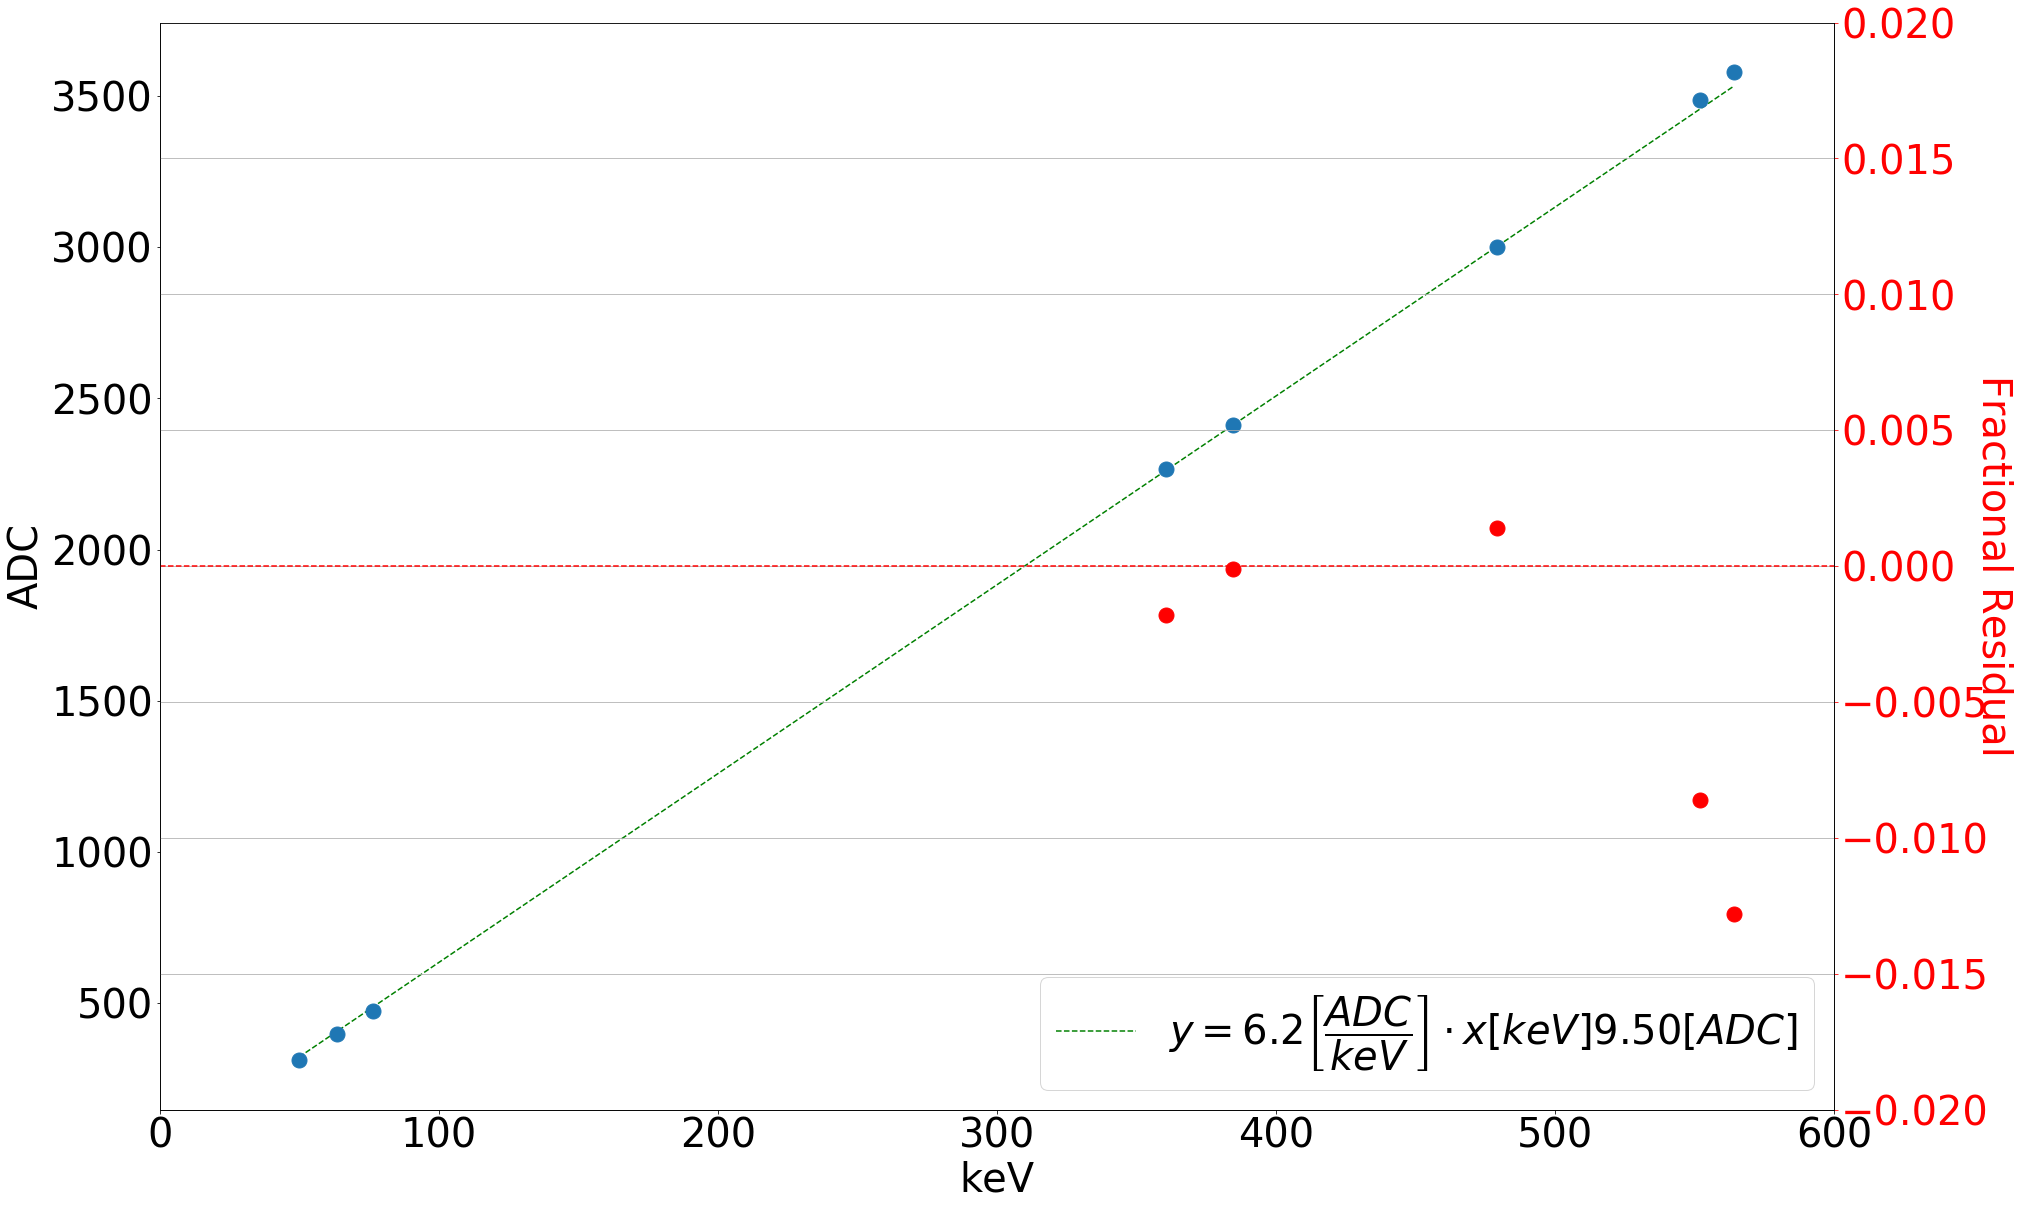

In [17]:
ms=15
xdata,ydata=np.array(xdata,float),np.array(ydata,float)
#line = lambda t,a,b,c:a*t+b+c*np.power(t,2)
#pars=[0.15,0,0]
line = lambda t,a,b:a*t+b
pars=[0.15,0]
#pars=curve_fit(line,xdata[:,1],ydata[:,1],p0=pars,sigma=ydata[:,5])[0]
#invpars=curve_fit(line,ydata[:,1],xdata[:,1],p0=pars,sigma=xdata[:,5])[0]
xdata,ydata=np.array(xdata,float),np.array(ydata,float)
xval,xerr,yval,yerr=xdata[:,4],xdata[:,5],ydata[:,4],ydata[:,5]
data=RealData(xval,y=yval,sx=xerr,sy=yerr)
odr=ODR(data,unilinear,beta0=pars)
out=odr.run()
pars=out.beta

res=line(xdata[:,1],*pars)/ydata[:,1]-1.
t=np.linspace(min(xdata[:,1]),max(xdata[:,1]),1000)
plt.figure(figsize=(30,20))
err=ydata[:,2]#*ydata[:,1]
plt.errorbar(xdata[:,1],ydata[:,1],err,fmt='o',ms=ms)
plt.plot(t,line(t,*pars),'g--',label=r'$y={0:0.1f} \left[\dfrac{{ADC}}{{keV}}\right] \cdot x [keV]  {1:0.2f} [ADC]$'.format(pars[0],pars[1]))
#plt.plot(t,line(t,*pars),'g--',label=r'$y={0:0.1f} \left[\dfrac{{ADC}}{{keV}}\right] \cdot x [keV]+ ({2:0.1E}) \left[\dfrac{{ADC}}{{keV^2}}\right] \cdot (x[keV])^2 + {1:0.4f} [ADC] $'.format(pars[0],pars[1],pars[2]))
#plt.plot(t,line(t,*pars),'g--',label=r'$y={0:0.1f} \left[\dfrac{{keV}}{{ADC}}\right] \cdot x [ADC]+ ({2:0.1E}) \left[\dfrac{{keV}}{{ADC^2}}\right] \cdot (x[ADC])^2 + {1:0.4f} [keV] $'.format(invpars[0],invpars[1],invpars[2]))
plt.legend(loc=4,fontsize=fs)
plt.xlabel('keV',fontsize=fs)
plt.ylabel('ADC',fontsize=fs)
plt.tick_params(labelsize=fs)
plt.xlim(350,600)
#plt.ylim(-6e-3,6e-3)
#plt.grid()
#plt.tick_params('y',colors='r',labelsize=fs)
plt.twinx()
plt.plot(xdata[:,1],res,'ro',ms=ms)
plt.plot((0,600),(0,0),'r--')
plt.ylabel('Fractional Residual',color='r',fontsize=fs,rotation=270,labelpad=25)
#plt.text(375,0.004,'Line + Gaussian Peak Fit',fontsize=fs)
plt.xlim(0,600)
plt.ylim(-20e-3,20e-3)
plt.grid()
plt.tick_params('y',colors='r',labelsize=fs)
plt.savefig('52Wcalibration_linfit.pdf',format='pdf')
plt.savefig('52Wcalib_fracresid_linfit.png')
plt.show()

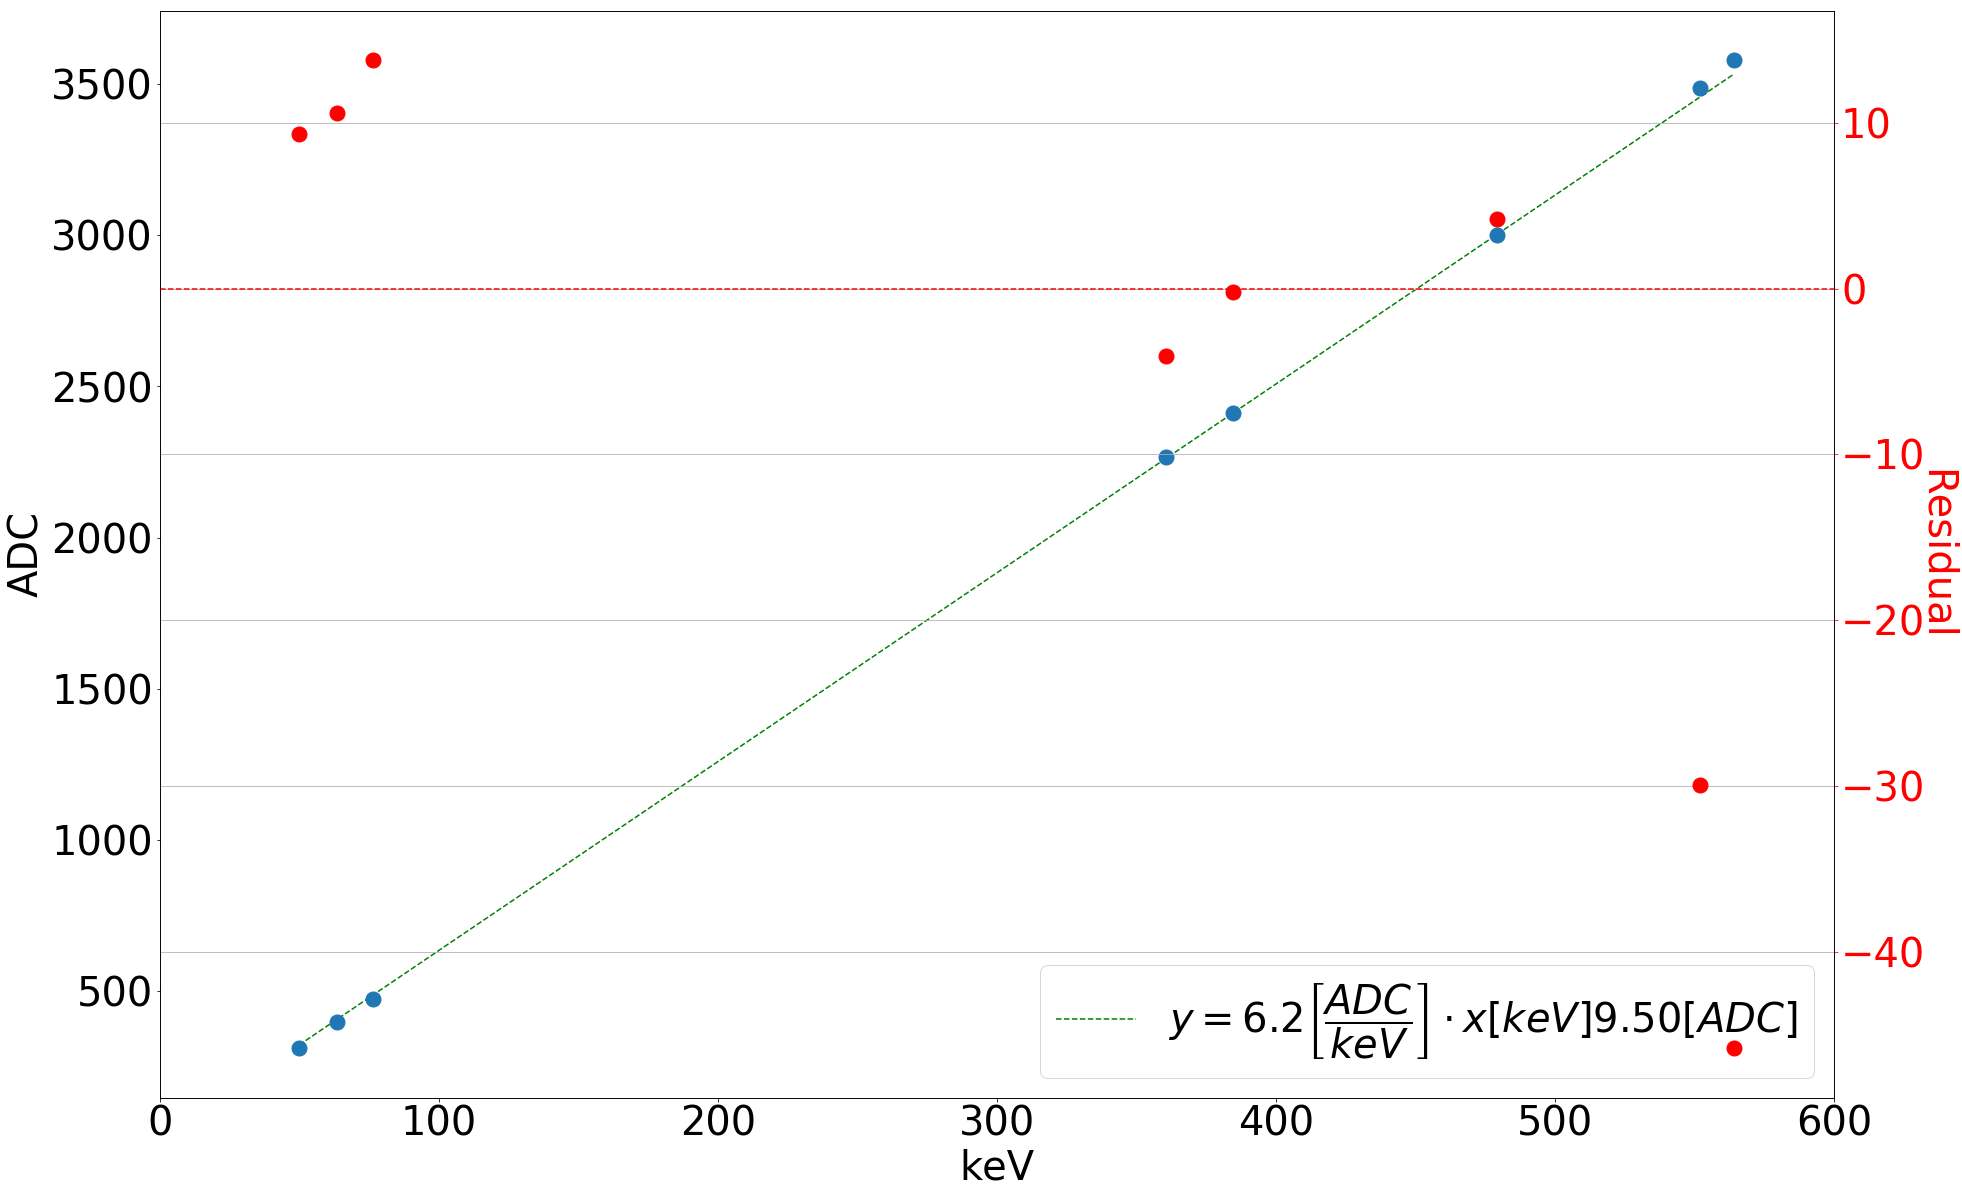

In [18]:
xdata,ydata=np.array(xdata,float),np.array(ydata,float)
#line = lambda t,a,b,c:a*t+b+c*np.power(t,2)
#pars=[0.15,0,0]
line = lambda t,a,b:a*t+b
pars=[0.15,0]
#pars=curve_fit(line,xdata[:,1],ydata[:,1],p0=pars,sigma=ydata[:,5])[0]
#invpars=curve_fit(line,ydata[:,1],xdata[:,1],p0=pars,sigma=xdata[:,5])[0]
data=RealData(xval,y=yval,sx=xerr,sy=yerr)
odr=ODR(data,unilinear,beta0=pars)
out=odr.run()
pars=out.beta

res=line(xdata[:,1],*pars)-ydata[:,1]
t=np.linspace(min(xdata[:,1]),max(xdata[:,1]),1000)
plt.figure(figsize=(30,20))
err=ydata[:,2]#*ydata[:,1]
plt.errorbar(xdata[:,1],ydata[:,1],err,fmt='o',ms=ms)
plt.plot(t,line(t,*pars),'g--',label=r'$y={0:0.1f} \left[\dfrac{{ADC}}{{keV}}\right] \cdot x [keV]  {1:0.2f} [ADC]$'.format(pars[0],pars[1]))
#plt.plot(t,line(t,*pars),'g--',label=r'$y={0:0.1f} \left[\dfrac{{ADC}}{{keV}}\right] \cdot x [keV]+ ({2:0.1E}) \left[\dfrac{{ADC}}{{keV^2}}\right] \cdot (x[keV])^2 + {1:0.4f} [ADC] $'.format(pars[0],pars[1],pars[2]))
#plt.plot(t,line(t,*pars),'g--',label=r'$y={0:0.1f} \left[\dfrac{{keV}}{{ADC}}\right] \cdot x [ADC]+ ({2:0.1E}) \left[\dfrac{{keV}}{{ADC^2}}\right] \cdot (x[ADC])^2 + {1:0.4f} [keV] $'.format(invpars[0],invpars[1],invpars[2]))
plt.legend(loc=4,fontsize=fs)
plt.xlabel('keV',fontsize=fs)
plt.ylabel('ADC',fontsize=fs)
plt.tick_params(labelsize=fs)
plt.xlim(350,600)
#plt.ylim(-6e-3,6e-3)
#plt.grid()
#plt.tick_params('y',colors='r',labelsize=fs)
plt.twinx()
plt.plot(xdata[:,1],res,'ro',ms=ms)
plt.plot((0,600),(0,0),'r--')
plt.ylabel('Residual',color='r',fontsize=fs,rotation=270,labelpad=30)
#plt.text(375,0.004,'Line + Gaussian Peak Fit',fontsize=fs)
plt.xlim(0,600)
#plt.ylim(-5e-2,5e-2)
plt.grid()
plt.tick_params('y',colors='r',labelsize=fs)
plt.savefig('52Wcalibration_linfit.pdf',format='pdf')
plt.savefig('52Wcalib_resid_linfit.png')
plt.show()

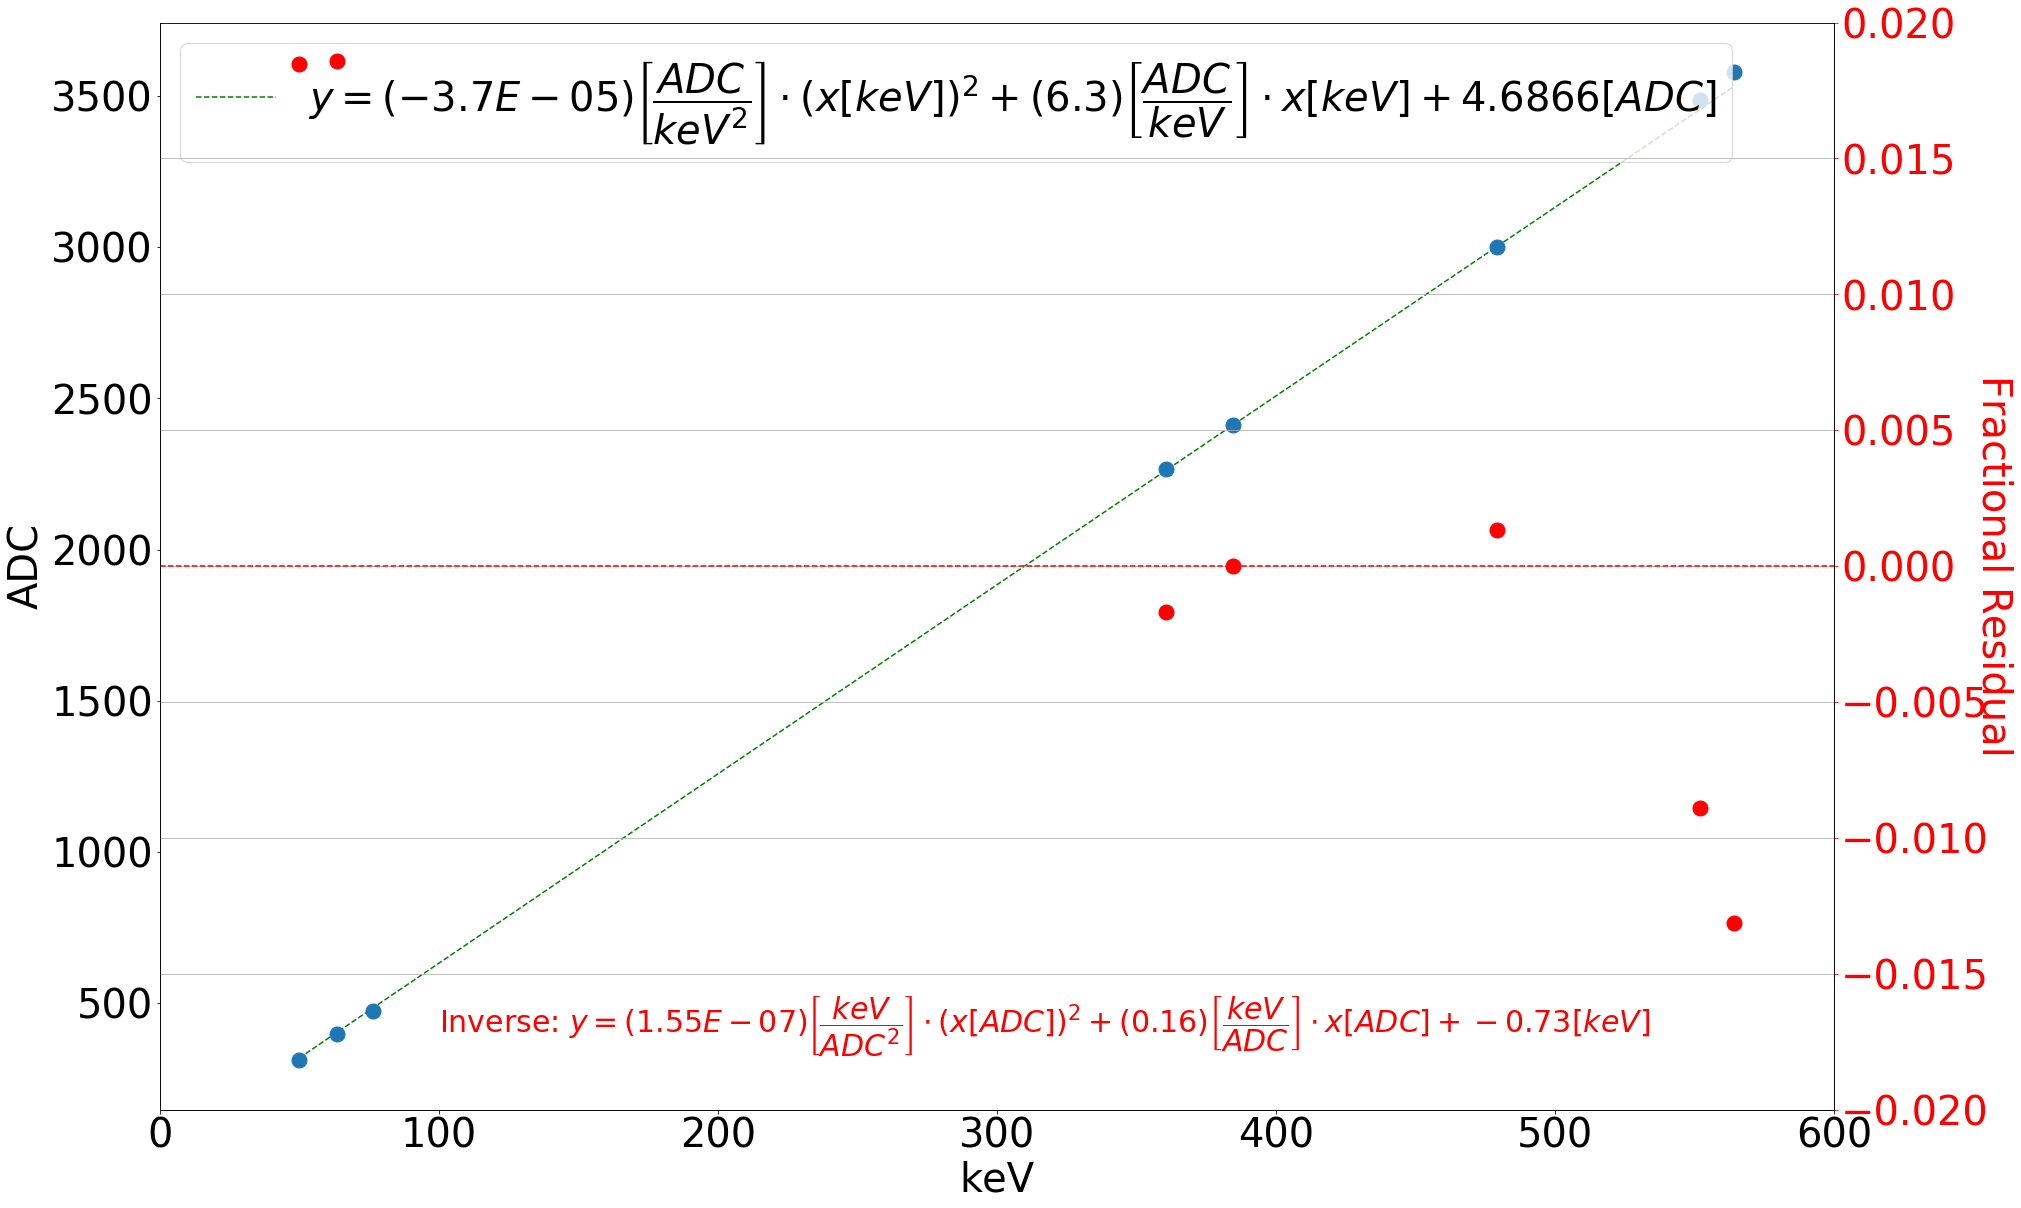

In [19]:
ms=15
xdata,ydata=np.array(xdata,float),np.array(ydata,float)
line = lambda t,a,b,c:a*np.power(t,2)+b*t+c
pars=[0.15,0,0]
#pars=curve_fit(line,xdata[:,1],ydata[:,1],p0=pars,sigma=ydata[:,5])[0]
#invpars=curve_fit(line,ydata[:,1],xdata[:,1],p0=pars,sigma=xdata[:,5])[0]
data=RealData(xval,y=yval,sx=xerr,sy=yerr)
odr=ODR(data,quadratic,beta0=pars)
out=odr.run()
pars=out.beta
res=line(xdata[:,1],*pars)/ydata[:,1]-1.
data=RealData(yval,y=xval,sx=yerr,sy=xerr)
odr=ODR(data,quadratic,beta0=pars)
out=odr.run()
invpars=out.beta
t=np.linspace(min(xdata[:,1]),max(xdata[:,1]),1000)
plt.figure(figsize=(30,20))
err=ydata[:,2]#*ydata[:,1]
plt.errorbar(xdata[:,1],ydata[:,1],err,fmt='o',ms=ms)
#plt.plot(t,line(t,*pars),'g--',label=r'$y={0:0.1f} \left[\dfrac{{ADC}}{{keV}}\right] \cdot x [keV]+ ({2:0.1E}) \left[\dfrac{{ADC}}{{keV^2}}\right] \cdot (x[keV])^2 + {1:0.4f} [ADC] $'.format(pars[0],pars[1],pars[2]))
plt.plot(t,line(t,*pars),'g--',label=r'$y=({0:0.1E}) \left[\dfrac{{ADC}}{{keV^2}}\right] \cdot (x[keV])^2 + ({1:0.1f}) \left[\dfrac{{ADC}}{{keV}}\right] \cdot x [keV] + {2:0.4f} [ADC] $'.format(pars[0],pars[1],pars[2]))
plt.legend(loc=2,fontsize=fs)
plt.xlabel('keV',fontsize=fs)
plt.ylabel('ADC',fontsize=fs)
plt.tick_params(labelsize=fs)
s='Inverse: '+r'$y=({0:0.2E}) \left[\dfrac{{keV}}{{ADC^2}}\right] \cdot (x[ADC])^2 + ({1:0.2f}) \left[\dfrac{{keV}}{{ADC}}\right] \cdot x [ADC] + {2:0.2f} [keV] $'.format(invpars[0],invpars[1],invpars[2])
plt.text(100,400,s=s,fontsize=fs-10,color='red')
plt.xlim(0,600)
#plt.ylim(0,2700)
plt.twinx()
plt.plot(xdata[:,1],res,'ro',ms=ms)
plt.plot((0,600),(0,0),'r--')
plt.ylabel('Fractional Residual',color='r',fontsize=fs,rotation=270,labelpad=25)
#plt.text(375,0.004,'Line + Gaussian Peak Fit',fontsize=fs)
plt.xlim(0,600)
plt.ylim(-20e-3,20e-3)
plt.grid()
plt.tick_params('y',colors='r',labelsize=fs)
plt.savefig('52Wcalibration_quadfit.pdf',format='pdf')
plt.savefig('52Wcalibration_quadfit.png')
plt.show()

ALL CELLS BELOW ARE WORK TOWARDS DOING A BIN BY BIN FIT TO SIMULATION: STALLED


bd,ch=4,3
hist,bins=np.histogram(pd.single_pixel(bidata,4,3)['energy'],bins=1000,range=[0,5000])
hsim,sbins=np.histogram(pd.sim_single_pixel(bisim,4,3)['energy'],bins=2000,range=[0,800])
hist,bins=np.array(hist,dtype=float),pd.cbins(bins)
hsim,sbins=np.array(hsim,dtype=float),pd.cbins(sbins)
datamax=np.amax(hist[bins>2000])
simmax=np.amax(hsim[sbins>400])
plt.figure(figsize=(30,20))
plt.plot(sbins,hsim/simmax,ls='steps')
plt.plot(bins*0.165,hist/datamax,ls='steps')
plt.yscale('log')
#plt.ylim(1E-5,1)
plt.tick_params(labelsize=25)
normdata=hist/datamax
normsim=hsim/simmax

bd,ch=4,3
hist,bins=np.histogram(pd.single_pixel(sndata,4,3)['energy'],bins=1000,range=[0,5000])
hsim,sbins=np.histogram(pd.sim_single_pixel(snsim,4,3)['energy'],bins=2000,range=[0,800])
hist,bins=np.array(hist,dtype=float),pd.cbins(bins)
hsim,sbins=np.array(hsim,dtype=float),pd.cbins(sbins)
datamax=np.amax(hist[bins>2000])
simmax=np.amax(hsim[sbins>300])
plt.figure(figsize=(30,20))
plt.plot(sbins,hsim/simmax,ls='steps')
plt.plot(bins*0.165,hist/datamax,ls='steps')
plt.yscale('log')
#plt.ylim(1E-5,1)
plt.tick_params(labelsize=25)
normdata+=hist/datamax
normsim+=hsim/simmax

plt.figure(figsize=(30,20))
plt.plot(bins*.165,normdata,ls='steps')
plt.plot(sbins,normsim,ls='steps')
plt.yscale('log')
plt.xlim(0,800)

data=np.concatenate((sndata,bidata))
snhist,bins=np.histogram(pd.single_pixel(sndata,bd,ch)['energy']*cal,bins=2000,range=[0,800])
bihist,bins=np.histogram(pd.single_pixel(bidata,bd,ch)['energy']*cal,bins=2000,range=[0,800])
snhist,bihist=np.array(snhist,dtype=float),np.array(snhist,dtype=float)